In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# Optimization #1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"],1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df['APPLICATION_TYPE'].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

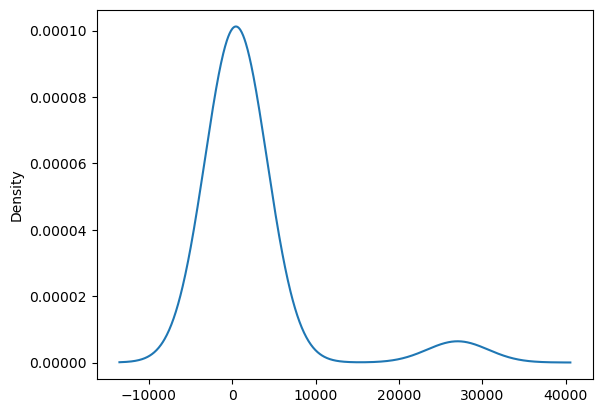

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_counts[app_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

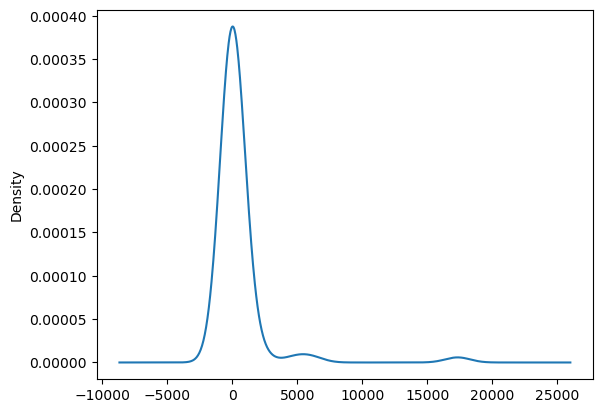

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1883].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints1/",exist_ok=True)
checkpoint_path = "checkpoints1/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [17]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=25,callbacks=[cp_callback])

Epoch 1/25
  1/804 [..............................] - ETA: 14:01 - loss: 0.8759 - accuracy: 0.4375
Epoch 00001: saving model to checkpoints1\weights.01.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.7248 - accuracy: 0.5156   
Epoch 00001: saving model to checkpoints1\weights.01.hdf5
 14/804 [..............................] - ETA: 6s - loss: 0.7023 - accuracy: 0.5558
Epoch 00001: saving model to checkpoints1\weights.01.hdf5
 19/804 [..............................] - ETA: 6s - loss: 0.7039 - accuracy: 0.5378
Epoch 00001: saving model to checkpoints1\weights.01.hdf5

Epoch 00001: saving model to checkpoints1\weights.01.hdf5
 26/804 [..............................] - ETA: 7s - loss: 0.7038 - accuracy: 0.5144
Epoch 00001: saving model to checkpoints1\weights.01.hdf5
 31/804 [>.............................] - ETA: 7s - loss: 0.7025 - accuracy: 0.5151
Epoch 00001: saving model to checkpoints1\weights.01.hdf5
 36/804 [>.............................] - ETA: 7s - loss: 0.7013 

333/804 [===========>..................] - ETA: 4s - loss: 0.6938 - accuracy: 0.5279
Epoch 00001: saving model to checkpoints1\weights.01.hdf5

Epoch 00001: saving model to checkpoints1\weights.01.hdf5
341/804 [===========>..................] - ETA: 4s - loss: 0.6938 - accuracy: 0.5277
Epoch 00001: saving model to checkpoints1\weights.01.hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.6938 - accuracy: 0.5263
Epoch 00001: saving model to checkpoints1\weights.01.hdf5

Epoch 00001: saving model to checkpoints1\weights.01.hdf5
356/804 [============>.................] - ETA: 4s - loss: 0.6938 - accuracy: 0.5255
Epoch 00001: saving model to checkpoints1\weights.01.hdf5
365/804 [============>.................] - ETA: 3s - loss: 0.6938 - accuracy: 0.5256
Epoch 00001: saving model to checkpoints1\weights.01.hdf5

Epoch 00001: saving model to checkpoints1\weights.01.hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.6937 - accuracy: 0.5264
Epoch 00001: saving mod

683/804 [========================>.....] - ETA: 1s - loss: 0.6940 - accuracy: 0.5221
Epoch 00001: saving model to checkpoints1\weights.01.hdf5

Epoch 00001: saving model to checkpoints1\weights.01.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.6940 - accuracy: 0.5220
Epoch 00001: saving model to checkpoints1\weights.01.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6940 - accuracy: 0.5216
Epoch 00001: saving model to checkpoints1\weights.01.hdf5

Epoch 00001: saving model to checkpoints1\weights.01.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6940 - accuracy: 0.5211
Epoch 00001: saving model to checkpoints1\weights.01.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6940 - accuracy: 0.5211
Epoch 00001: saving model to checkpoints1\weights.01.hdf5

Epoch 00001: saving model to checkpoints1\weights.01.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6940 - accuracy: 0.5205
Epoch 00001: saving mod

232/804 [=======>......................] - ETA: 4s - loss: 0.6934 - accuracy: 0.5159
Epoch 00002: saving model to checkpoints1\weights.02.hdf5
237/804 [=======>......................] - ETA: 4s - loss: 0.6935 - accuracy: 0.5128
Epoch 00002: saving model to checkpoints1\weights.02.hdf5

Epoch 00002: saving model to checkpoints1\weights.02.hdf5
247/804 [========>.....................] - ETA: 4s - loss: 0.6935 - accuracy: 0.5119
Epoch 00002: saving model to checkpoints1\weights.02.hdf5
255/804 [========>.....................] - ETA: 4s - loss: 0.6936 - accuracy: 0.5116
Epoch 00002: saving model to checkpoints1\weights.02.hdf5

Epoch 00002: saving model to checkpoints1\weights.02.hdf5
262/804 [========>.....................] - ETA: 4s - loss: 0.6935 - accuracy: 0.5120
Epoch 00002: saving model to checkpoints1\weights.02.hdf5
268/804 [=========>....................] - ETA: 4s - loss: 0.6935 - accuracy: 0.5121
Epoch 00002: saving model to checkpoints1\weights.02.hdf5
272/804 [=========>.....

567/804 [====================>.........] - ETA: 2s - loss: 0.6926 - accuracy: 0.5216
Epoch 00002: saving model to checkpoints1\weights.02.hdf5
572/804 [====================>.........] - ETA: 2s - loss: 0.6926 - accuracy: 0.5219
Epoch 00002: saving model to checkpoints1\weights.02.hdf5

Epoch 00002: saving model to checkpoints1\weights.02.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6926 - accuracy: 0.5219
Epoch 00002: saving model to checkpoints1\weights.02.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6927 - accuracy: 0.5218
Epoch 00002: saving model to checkpoints1\weights.02.hdf5

Epoch 00002: saving model to checkpoints1\weights.02.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6927 - accuracy: 0.5217
Epoch 00002: saving model to checkpoints1\weights.02.hdf5

Epoch 00002: saving model to checkpoints1\weights.02.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6927 - accuracy: 0.5215
Epoch 00002: saving mod

104/804 [==>...........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5258
Epoch 00003: saving model to checkpoints1\weights.03.hdf5
111/804 [===>..........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5284
Epoch 00003: saving model to checkpoints1\weights.03.hdf5

Epoch 00003: saving model to checkpoints1\weights.03.hdf5
118/804 [===>..........................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5270
Epoch 00003: saving model to checkpoints1\weights.03.hdf5
123/804 [===>..........................] - ETA: 6s - loss: 0.6916 - accuracy: 0.5277
Epoch 00003: saving model to checkpoints1\weights.03.hdf5
128/804 [===>..........................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5291
Epoch 00003: saving model to checkpoints1\weights.03.hdf5
133/804 [===>..........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5305
Epoch 00003: saving model to checkpoints1\weights.03.hdf5
142/804 [====>.........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.532

447/804 [===============>..............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5342
Epoch 00003: saving model to checkpoints1\weights.03.hdf5

Epoch 00003: saving model to checkpoints1\weights.03.hdf5
453/804 [===============>..............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5346
Epoch 00003: saving model to checkpoints1\weights.03.hdf5
458/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5348
Epoch 00003: saving model to checkpoints1\weights.03.hdf5

Epoch 00003: saving model to checkpoints1\weights.03.hdf5
468/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5347
Epoch 00003: saving model to checkpoints1\weights.03.hdf5
475/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5355
Epoch 00003: saving model to checkpoints1\weights.03.hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5353
Epoch 00003: saving model to checkpoints1\weights.03.hdf5

Epoch 00003: saving mod

783/804 [============================>.] - ETA: 0s - loss: 0.6921 - accuracy: 0.5269
Epoch 00003: saving model to checkpoints1\weights.03.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6921 - accuracy: 0.5276
Epoch 00003: saving model to checkpoints1\weights.03.hdf5

Epoch 00003: saving model to checkpoints1\weights.03.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6921 - accuracy: 0.5271
Epoch 00003: saving model to checkpoints1\weights.03.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6921 - accuracy: 0.5272
Epoch 4/25
  1/804 [..............................] - ETA: 4s - loss: 0.6824 - accuracy: 0.6250
Epoch 00004: saving model to checkpoints1\weights.04.hdf5

Epoch 00004: saving model to checkpoints1\weights.04.hdf5
  9/804 [..............................] - ETA: 6s - loss: 0.6866 - accuracy: 0.5764
Epoch 00004: saving model to checkpoints1\weights.04.hdf5
 16/804 [..............................] - ETA: 6s - loss: 0.6867 -

299/804 [==========>...................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5226
Epoch 00004: saving model to checkpoints1\weights.04.hdf5
304/804 [==========>...................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5234
Epoch 00004: saving model to checkpoints1\weights.04.hdf5
309/804 [==========>...................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5232
Epoch 00004: saving model to checkpoints1\weights.04.hdf5
314/804 [==========>...................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5235
Epoch 00004: saving model to checkpoints1\weights.04.hdf5
319/804 [==========>...................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5231
Epoch 00004: saving model to checkpoints1\weights.04.hdf5
324/804 [===========>..................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5231
Epoch 00004: saving model to checkpoints1\weights.04.hdf5
329/804 [===========>..................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5233
Epoch 00004: saving model to checkpoints1\weights.04.hdf5

604/804 [=====================>........] - ETA: 2s - loss: 0.6920 - accuracy: 0.5296
Epoch 00004: saving model to checkpoints1\weights.04.hdf5
609/804 [=====================>........] - ETA: 2s - loss: 0.6919 - accuracy: 0.5298
Epoch 00004: saving model to checkpoints1\weights.04.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.6920 - accuracy: 0.5295
Epoch 00004: saving model to checkpoints1\weights.04.hdf5
620/804 [======================>.......] - ETA: 2s - loss: 0.6919 - accuracy: 0.5299
Epoch 00004: saving model to checkpoints1\weights.04.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6919 - accuracy: 0.5299
Epoch 00004: saving model to checkpoints1\weights.04.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.6919 - accuracy: 0.5298
Epoch 00004: saving model to checkpoints1\weights.04.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6919 - accuracy: 0.5298
Epoch 00004: saving model to checkpoints1\weights.04.hdf5

145/804 [====>.........................] - ETA: 5s - loss: 0.6930 - accuracy: 0.5172
Epoch 00005: saving model to checkpoints1\weights.05.hdf5

Epoch 00005: saving model to checkpoints1\weights.05.hdf5
155/804 [====>.........................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5202
Epoch 00005: saving model to checkpoints1\weights.05.hdf5

Epoch 00005: saving model to checkpoints1\weights.05.hdf5
165/804 [=====>........................] - ETA: 5s - loss: 0.6930 - accuracy: 0.5184
Epoch 00005: saving model to checkpoints1\weights.05.hdf5

Epoch 00005: saving model to checkpoints1\weights.05.hdf5
175/804 [=====>........................] - ETA: 5s - loss: 0.6930 - accuracy: 0.5186
Epoch 00005: saving model to checkpoints1\weights.05.hdf5
184/804 [=====>........................] - ETA: 5s - loss: 0.6929 - accuracy: 0.5202
Epoch 00005: saving model to checkpoints1\weights.05.hdf5

Epoch 00005: saving model to checkpoints1\weights.05.hdf5
190/804 [======>.......................] - ETA: 5

Epoch 00005: saving model to checkpoints1\weights.05.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.6923 - accuracy: 0.5258
Epoch 00005: saving model to checkpoints1\weights.05.hdf5
510/804 [==================>...........] - ETA: 2s - loss: 0.6923 - accuracy: 0.5257
Epoch 00005: saving model to checkpoints1\weights.05.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.6922 - accuracy: 0.5262
Epoch 00005: saving model to checkpoints1\weights.05.hdf5

Epoch 00005: saving model to checkpoints1\weights.05.hdf5
525/804 [==================>...........] - ETA: 2s - loss: 0.6921 - accuracy: 0.5268
Epoch 00005: saving model to checkpoints1\weights.05.hdf5

Epoch 00005: saving model to checkpoints1\weights.05.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6921 - accuracy: 0.5272
Epoch 00005: saving model to checkpoints1\weights.05.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.6921 - accuracy: 0.5274
Epoch 00005: saving mode

 31/804 [>.............................] - ETA: 7s - loss: 0.6905 - accuracy: 0.5413
Epoch 00006: saving model to checkpoints1\weights.06.hdf5
 36/804 [>.............................] - ETA: 7s - loss: 0.6908 - accuracy: 0.5399
Epoch 00006: saving model to checkpoints1\weights.06.hdf5
 41/804 [>.............................] - ETA: 7s - loss: 0.6906 - accuracy: 0.5404
Epoch 00006: saving model to checkpoints1\weights.06.hdf5
 47/804 [>.............................] - ETA: 7s - loss: 0.6915 - accuracy: 0.5352
Epoch 00006: saving model to checkpoints1\weights.06.hdf5
 52/804 [>.............................] - ETA: 7s - loss: 0.6917 - accuracy: 0.5343
Epoch 00006: saving model to checkpoints1\weights.06.hdf5
 59/804 [=>............................] - ETA: 7s - loss: 0.6918 - accuracy: 0.5318
Epoch 00006: saving model to checkpoints1\weights.06.hdf5
 64/804 [=>............................] - ETA: 7s - loss: 0.6919 - accuracy: 0.5308
Epoch 00006: saving model to checkpoints1\weights.06.hdf5

387/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5370
Epoch 00006: saving model to checkpoints1\weights.06.hdf5
391/804 [=============>................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5369
Epoch 00006: saving model to checkpoints1\weights.06.hdf5
396/804 [=============>................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5373
Epoch 00006: saving model to checkpoints1\weights.06.hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5379
Epoch 00006: saving model to checkpoints1\weights.06.hdf5
407/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5379
Epoch 00006: saving model to checkpoints1\weights.06.hdf5

Epoch 00006: saving model to checkpoints1\weights.06.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5370
Epoch 00006: saving model to checkpoints1\weights.06.hdf5

Epoch 00006: saving model to checkpoints1\weights.06.hdf5
426/804 [==============>

726/804 [==========================>...] - ETA: 0s - loss: 0.6918 - accuracy: 0.5299
Epoch 00006: saving model to checkpoints1\weights.06.hdf5

Epoch 00006: saving model to checkpoints1\weights.06.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6918 - accuracy: 0.5297
Epoch 00006: saving model to checkpoints1\weights.06.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6918 - accuracy: 0.5299
Epoch 00006: saving model to checkpoints1\weights.06.hdf5

Epoch 00006: saving model to checkpoints1\weights.06.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6918 - accuracy: 0.5298
Epoch 00006: saving model to checkpoints1\weights.06.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6918 - accuracy: 0.5297
Epoch 00006: saving model to checkpoints1\weights.06.hdf5

Epoch 00006: saving model to checkpoints1\weights.06.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6918 - accuracy: 0.5296
Epoch 00006: saving mod

269/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5279
Epoch 00007: saving model to checkpoints1\weights.07.hdf5

Epoch 00007: saving model to checkpoints1\weights.07.hdf5
277/804 [=========>....................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5282
Epoch 00007: saving model to checkpoints1\weights.07.hdf5

Epoch 00007: saving model to checkpoints1\weights.07.hdf5
287/804 [=========>....................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5299
Epoch 00007: saving model to checkpoints1\weights.07.hdf5

Epoch 00007: saving model to checkpoints1\weights.07.hdf5
297/804 [==========>...................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5305
Epoch 00007: saving model to checkpoints1\weights.07.hdf5

Epoch 00007: saving model to checkpoints1\weights.07.hdf5
307/804 [==========>...................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5318
Epoch 00007: saving model to checkpoints1\weights.07.hdf5
315/804 [==========>...................] - ETA: 4

645/804 [=======================>......] - ETA: 1s - loss: 0.6918 - accuracy: 0.5278
Epoch 00007: saving model to checkpoints1\weights.07.hdf5

Epoch 00007: saving model to checkpoints1\weights.07.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6918 - accuracy: 0.5278
Epoch 00007: saving model to checkpoints1\weights.07.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.6918 - accuracy: 0.5280
Epoch 00007: saving model to checkpoints1\weights.07.hdf5

Epoch 00007: saving model to checkpoints1\weights.07.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.6918 - accuracy: 0.5282
Epoch 00007: saving model to checkpoints1\weights.07.hdf5

Epoch 00007: saving model to checkpoints1\weights.07.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.6918 - accuracy: 0.5280
Epoch 00007: saving model to checkpoints1\weights.07.hdf5

Epoch 00007: saving model to checkpoints1\weights.07.hdf5
687/804 [========================>.....] - ETA: 0

197/804 [======>.......................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5266
Epoch 00008: saving model to checkpoints1\weights.08.hdf5

Epoch 00008: saving model to checkpoints1\weights.08.hdf5
203/804 [======>.......................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5288
Epoch 00008: saving model to checkpoints1\weights.08.hdf5

Epoch 00008: saving model to checkpoints1\weights.08.hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5270
Epoch 00008: saving model to checkpoints1\weights.08.hdf5
221/804 [=======>......................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5290
Epoch 00008: saving model to checkpoints1\weights.08.hdf5

Epoch 00008: saving model to checkpoints1\weights.08.hdf5
228/804 [=======>......................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5302
Epoch 00008: saving model to checkpoints1\weights.08.hdf5
237/804 [=======>......................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5285
Epoch 00008: saving mod

548/804 [===================>..........] - ETA: 2s - loss: 0.6920 - accuracy: 0.5311
Epoch 00008: saving model to checkpoints1\weights.08.hdf5
555/804 [===================>..........] - ETA: 2s - loss: 0.6920 - accuracy: 0.5309
Epoch 00008: saving model to checkpoints1\weights.08.hdf5

Epoch 00008: saving model to checkpoints1\weights.08.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.6920 - accuracy: 0.5314
Epoch 00008: saving model to checkpoints1\weights.08.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 0.6920 - accuracy: 0.5315
Epoch 00008: saving model to checkpoints1\weights.08.hdf5

Epoch 00008: saving model to checkpoints1\weights.08.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6920 - accuracy: 0.5315
Epoch 00008: saving model to checkpoints1\weights.08.hdf5

Epoch 00008: saving model to checkpoints1\weights.08.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6919 - accuracy: 0.5317
Epoch 00008: saving mod

 90/804 [==>...........................] - ETA: 6s - loss: 0.6929 - accuracy: 0.5215
Epoch 00009: saving model to checkpoints1\weights.09.hdf5
 94/804 [==>...........................] - ETA: 6s - loss: 0.6928 - accuracy: 0.5223
Epoch 00009: saving model to checkpoints1\weights.09.hdf5

Epoch 00009: saving model to checkpoints1\weights.09.hdf5
104/804 [==>...........................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5234
Epoch 00009: saving model to checkpoints1\weights.09.hdf5
113/804 [===>..........................] - ETA: 6s - loss: 0.6928 - accuracy: 0.5210
Epoch 00009: saving model to checkpoints1\weights.09.hdf5

Epoch 00009: saving model to checkpoints1\weights.09.hdf5
119/804 [===>..........................] - ETA: 6s - loss: 0.6927 - accuracy: 0.5226
Epoch 00009: saving model to checkpoints1\weights.09.hdf5

Epoch 00009: saving model to checkpoints1\weights.09.hdf5
129/804 [===>..........................] - ETA: 6s - loss: 0.6928 - accuracy: 0.5208
Epoch 00009: saving mod

444/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5294
Epoch 00009: saving model to checkpoints1\weights.09.hdf5

Epoch 00009: saving model to checkpoints1\weights.09.hdf5
454/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5293
Epoch 00009: saving model to checkpoints1\weights.09.hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5294
Epoch 00009: saving model to checkpoints1\weights.09.hdf5
467/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5297
Epoch 00009: saving model to checkpoints1\weights.09.hdf5
469/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5296
Epoch 00009: saving model to checkpoints1\weights.09.hdf5
475/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5301
Epoch 00009: saving model to checkpoints1\weights.09.hdf5

Epoch 00009: saving model to checkpoints1\weights.09.hdf5
484/804 [===============

797/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5291
Epoch 00009: saving model to checkpoints1\weights.09.hdf5

Epoch 00009: saving model to checkpoints1\weights.09.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6916 - accuracy: 0.5294
Epoch 10/25
  1/804 [..............................] - ETA: 2s - loss: 0.6786 - accuracy: 0.6250
Epoch 00010: saving model to checkpoints1\weights.10.hdf5

Epoch 00010: saving model to checkpoints1\weights.10.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5250
Epoch 00010: saving model to checkpoints1\weights.10.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.6877 - accuracy: 0.5533
Epoch 00010: saving model to checkpoints1\weights.10.hdf5
 22/804 [..............................] - ETA: 6s - loss: 0.6868 - accuracy: 0.5568
Epoch 00010: saving model to checkpoints1\weights.10.hdf5

Epoch 00010: saving model to checkpoints1\weights.10.hdf5
 30/804

350/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5370
Epoch 00010: saving model to checkpoints1\weights.10.hdf5

Epoch 00010: saving model to checkpoints1\weights.10.hdf5
360/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5379
Epoch 00010: saving model to checkpoints1\weights.10.hdf5

Epoch 00010: saving model to checkpoints1\weights.10.hdf5
370/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5364
Epoch 00010: saving model to checkpoints1\weights.10.hdf5

Epoch 00010: saving model to checkpoints1\weights.10.hdf5
380/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5357
Epoch 00010: saving model to checkpoints1\weights.10.hdf5

Epoch 00010: saving model to checkpoints1\weights.10.hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5337
Epoch 00010: saving model to checkpoints1\weights.10.hdf5
396/804 [=============>................] - ETA: 3

700/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5305
Epoch 00010: saving model to checkpoints1\weights.10.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5309
Epoch 00010: saving model to checkpoints1\weights.10.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5316
Epoch 00010: saving model to checkpoints1\weights.10.hdf5

Epoch 00010: saving model to checkpoints1\weights.10.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5313
Epoch 00010: saving model to checkpoints1\weights.10.hdf5

Epoch 00010: saving model to checkpoints1\weights.10.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5319
Epoch 00010: saving model to checkpoints1\weights.10.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5320
Epoch 00010: saving model to checkpoints1\weights.10.hdf5
740/804 [===============


Epoch 00011: saving model to checkpoints1\weights.11.hdf5
256/804 [========>.....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5295
Epoch 00011: saving model to checkpoints1\weights.11.hdf5
265/804 [========>.....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5295
Epoch 00011: saving model to checkpoints1\weights.11.hdf5

Epoch 00011: saving model to checkpoints1\weights.11.hdf5
271/804 [=========>....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5296
Epoch 00011: saving model to checkpoints1\weights.11.hdf5

Epoch 00011: saving model to checkpoints1\weights.11.hdf5
281/804 [=========>....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5296
Epoch 00011: saving model to checkpoints1\weights.11.hdf5
286/804 [=========>....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5302
Epoch 00011: saving model to checkpoints1\weights.11.hdf5
291/804 [=========>....................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5310
Epoch 00011: saving mod


Epoch 00011: saving model to checkpoints1\weights.11.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6921 - accuracy: 0.5302
Epoch 00011: saving model to checkpoints1\weights.11.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.6921 - accuracy: 0.5301
Epoch 00011: saving model to checkpoints1\weights.11.hdf5

Epoch 00011: saving model to checkpoints1\weights.11.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.6922 - accuracy: 0.5296
Epoch 00011: saving model to checkpoints1\weights.11.hdf5

Epoch 00011: saving model to checkpoints1\weights.11.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.6921 - accuracy: 0.5301
Epoch 00011: saving model to checkpoints1\weights.11.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6922 - accuracy: 0.5300
Epoch 00011: saving model to checkpoints1\weights.11.hdf5

Epoch 00011: saving model to checkpoints1\weights.11.hdf5
671/804 [========================>.....] - ETA: 1

170/804 [=====>........................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5202
Epoch 00012: saving model to checkpoints1\weights.12.hdf5
173/804 [=====>........................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5193
Epoch 00012: saving model to checkpoints1\weights.12.hdf5
179/804 [=====>........................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5190
Epoch 00012: saving model to checkpoints1\weights.12.hdf5

Epoch 00012: saving model to checkpoints1\weights.12.hdf5
187/804 [=====>........................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5187
Epoch 00012: saving model to checkpoints1\weights.12.hdf5
192/804 [======>.......................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5192
Epoch 00012: saving model to checkpoints1\weights.12.hdf5
198/804 [======>.......................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5172
Epoch 00012: saving model to checkpoints1\weights.12.hdf5
204/804 [======>.......................] - ETA: 5s - loss: 0.6927 - accuracy: 0.517

537/804 [===================>..........] - ETA: 2s - loss: 0.6923 - accuracy: 0.5253
Epoch 00012: saving model to checkpoints1\weights.12.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.6923 - accuracy: 0.5252
Epoch 00012: saving model to checkpoints1\weights.12.hdf5

Epoch 00012: saving model to checkpoints1\weights.12.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.6923 - accuracy: 0.5251
Epoch 00012: saving model to checkpoints1\weights.12.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.6922 - accuracy: 0.5259
Epoch 00012: saving model to checkpoints1\weights.12.hdf5

Epoch 00012: saving model to checkpoints1\weights.12.hdf5
567/804 [====================>.........] - ETA: 2s - loss: 0.6922 - accuracy: 0.5266
Epoch 00012: saving model to checkpoints1\weights.12.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.6921 - accuracy: 0.5272
Epoch 00012: saving model to checkpoints1\weights.12.hdf5

Epoch 00012: saving mod

 90/804 [==>...........................] - ETA: 6s - loss: 0.6930 - accuracy: 0.5243
Epoch 00013: saving model to checkpoints1\weights.13.hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 0.6930 - accuracy: 0.5242
Epoch 00013: saving model to checkpoints1\weights.13.hdf5

Epoch 00013: saving model to checkpoints1\weights.13.hdf5
103/804 [==>...........................] - ETA: 6s - loss: 0.6929 - accuracy: 0.5249
Epoch 00013: saving model to checkpoints1\weights.13.hdf5
110/804 [===>..........................] - ETA: 6s - loss: 0.6929 - accuracy: 0.5250
Epoch 00013: saving model to checkpoints1\weights.13.hdf5
115/804 [===>..........................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5269
Epoch 00013: saving model to checkpoints1\weights.13.hdf5

Epoch 00013: saving model to checkpoints1\weights.13.hdf5
123/804 [===>..........................] - ETA: 6s - loss: 0.6915 - accuracy: 0.5330
Epoch 00013: saving model to checkpoints1\weights.13.hdf5
128/804 [===>...........

468/804 [================>.............] - ETA: 2s - loss: 0.6920 - accuracy: 0.5282
Epoch 00013: saving model to checkpoints1\weights.13.hdf5
477/804 [================>.............] - ETA: 2s - loss: 0.6920 - accuracy: 0.5279
Epoch 00013: saving model to checkpoints1\weights.13.hdf5

Epoch 00013: saving model to checkpoints1\weights.13.hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.6920 - accuracy: 0.5281
Epoch 00013: saving model to checkpoints1\weights.13.hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.6920 - accuracy: 0.5281
Epoch 00013: saving model to checkpoints1\weights.13.hdf5

Epoch 00013: saving model to checkpoints1\weights.13.hdf5
498/804 [=================>............] - ETA: 2s - loss: 0.6920 - accuracy: 0.5281
Epoch 00013: saving model to checkpoints1\weights.13.hdf5
507/804 [=================>............] - ETA: 2s - loss: 0.6920 - accuracy: 0.5281
Epoch 00013: saving model to checkpoints1\weights.13.hdf5

Epoch 00013: saving mod

 29/804 [>.............................] - ETA: 6s - loss: 0.6929 - accuracy: 0.5151
Epoch 00014: saving model to checkpoints1\weights.14.hdf5
 34/804 [>.............................] - ETA: 6s - loss: 0.6925 - accuracy: 0.5193
Epoch 00014: saving model to checkpoints1\weights.14.hdf5
 39/804 [>.............................] - ETA: 6s - loss: 0.6928 - accuracy: 0.5168
Epoch 00014: saving model to checkpoints1\weights.14.hdf5
 47/804 [>.............................] - ETA: 6s - loss: 0.6937 - accuracy: 0.5066
Epoch 00014: saving model to checkpoints1\weights.14.hdf5

Epoch 00014: saving model to checkpoints1\weights.14.hdf5
 54/804 [=>............................] - ETA: 6s - loss: 0.6936 - accuracy: 0.5012
Epoch 00014: saving model to checkpoints1\weights.14.hdf5
 63/804 [=>............................] - ETA: 6s - loss: 0.6937 - accuracy: 0.4975
Epoch 00014: saving model to checkpoints1\weights.14.hdf5

Epoch 00014: saving model to checkpoints1\weights.14.hdf5
 69/804 [=>.............

369/804 [============>.................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5257
Epoch 00014: saving model to checkpoints1\weights.14.hdf5
374/804 [============>.................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5262
Epoch 00014: saving model to checkpoints1\weights.14.hdf5
379/804 [=============>................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5269
Epoch 00014: saving model to checkpoints1\weights.14.hdf5
386/804 [=============>................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5272
Epoch 00014: saving model to checkpoints1\weights.14.hdf5
391/804 [=============>................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5262
Epoch 00014: saving model to checkpoints1\weights.14.hdf5

Epoch 00014: saving model to checkpoints1\weights.14.hdf5
399/804 [=============>................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5266
Epoch 00014: saving model to checkpoints1\weights.14.hdf5
404/804 [==============>...............] - ETA: 3s - loss: 0.6917 - accuracy: 0.526

721/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5303
Epoch 00014: saving model to checkpoints1\weights.14.hdf5

Epoch 00014: saving model to checkpoints1\weights.14.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5302
Epoch 00014: saving model to checkpoints1\weights.14.hdf5

Epoch 00014: saving model to checkpoints1\weights.14.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5301
Epoch 00014: saving model to checkpoints1\weights.14.hdf5

Epoch 00014: saving model to checkpoints1\weights.14.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5296
Epoch 00014: saving model to checkpoints1\weights.14.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5298
Epoch 00014: saving model to checkpoints1\weights.14.hdf5

Epoch 00014: saving model to checkpoints1\weights.14.hdf5
764/804 [===========================>..] - ETA: 0

285/804 [=========>....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5287
Epoch 00015: saving model to checkpoints1\weights.15.hdf5
293/804 [=========>....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5277
Epoch 00015: saving model to checkpoints1\weights.15.hdf5

Epoch 00015: saving model to checkpoints1\weights.15.hdf5
300/804 [==========>...................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5260
Epoch 00015: saving model to checkpoints1\weights.15.hdf5

Epoch 00015: saving model to checkpoints1\weights.15.hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5275
Epoch 00015: saving model to checkpoints1\weights.15.hdf5

Epoch 00015: saving model to checkpoints1\weights.15.hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5275
Epoch 00015: saving model to checkpoints1\weights.15.hdf5

Epoch 00015: saving model to checkpoints1\weights.15.hdf5
330/804 [===========>..................] - ETA: 3

655/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5329
Epoch 00015: saving model to checkpoints1\weights.15.hdf5

Epoch 00015: saving model to checkpoints1\weights.15.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5333
Epoch 00015: saving model to checkpoints1\weights.15.hdf5

Epoch 00015: saving model to checkpoints1\weights.15.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5332
Epoch 00015: saving model to checkpoints1\weights.15.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.6914 - accuracy: 0.5331
Epoch 00015: saving model to checkpoints1\weights.15.hdf5

Epoch 00015: saving model to checkpoints1\weights.15.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5331
Epoch 00015: saving model to checkpoints1\weights.15.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5328
Epoch 00015: saving mod

211/804 [======>.......................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5275
Epoch 00016: saving model to checkpoints1\weights.16.hdf5
218/804 [=======>......................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5278
Epoch 00016: saving model to checkpoints1\weights.16.hdf5

Epoch 00016: saving model to checkpoints1\weights.16.hdf5
226/804 [=======>......................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5279
Epoch 00016: saving model to checkpoints1\weights.16.hdf5

Epoch 00016: saving model to checkpoints1\weights.16.hdf5
236/804 [=======>......................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5273
Epoch 00016: saving model to checkpoints1\weights.16.hdf5

Epoch 00016: saving model to checkpoints1\weights.16.hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5273
Epoch 00016: saving model to checkpoints1\weights.16.hdf5

Epoch 00016: saving model to checkpoints1\weights.16.hdf5
256/804 [========>.....................] - ETA: 4

546/804 [===================>..........] - ETA: 2s - loss: 0.6920 - accuracy: 0.5295
Epoch 00016: saving model to checkpoints1\weights.16.hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.6919 - accuracy: 0.5297
Epoch 00016: saving model to checkpoints1\weights.16.hdf5

Epoch 00016: saving model to checkpoints1\weights.16.hdf5
561/804 [===================>..........] - ETA: 2s - loss: 0.6918 - accuracy: 0.5305
Epoch 00016: saving model to checkpoints1\weights.16.hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.6916 - accuracy: 0.5312
Epoch 00016: saving model to checkpoints1\weights.16.hdf5

Epoch 00016: saving model to checkpoints1\weights.16.hdf5
576/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5319
Epoch 00016: saving model to checkpoints1\weights.16.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5321
Epoch 00016: saving model to checkpoints1\weights.16.hdf5

Epoch 00016: saving mod

 77/804 [=>............................] - ETA: 6s - loss: 0.6906 - accuracy: 0.5377
Epoch 00017: saving model to checkpoints1\weights.17.hdf5
 82/804 [==>...........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5373
Epoch 00017: saving model to checkpoints1\weights.17.hdf5
 87/804 [==>...........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5363
Epoch 00017: saving model to checkpoints1\weights.17.hdf5
 92/804 [==>...........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5340
Epoch 00017: saving model to checkpoints1\weights.17.hdf5
 99/804 [==>...........................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5344
Epoch 00017: saving model to checkpoints1\weights.17.hdf5

Epoch 00017: saving model to checkpoints1\weights.17.hdf5
107/804 [==>...........................] - ETA: 6s - loss: 0.6912 - accuracy: 0.5330
Epoch 00017: saving model to checkpoints1\weights.17.hdf5

Epoch 00017: saving model to checkpoints1\weights.17.hdf5
117/804 [===>...........

412/804 [==============>...............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311
Epoch 00017: saving model to checkpoints1\weights.17.hdf5

Epoch 00017: saving model to checkpoints1\weights.17.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5320
Epoch 00017: saving model to checkpoints1\weights.17.hdf5
428/804 [==============>...............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5323
Epoch 00017: saving model to checkpoints1\weights.17.hdf5

Epoch 00017: saving model to checkpoints1\weights.17.hdf5
437/804 [===============>..............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5316
Epoch 00017: saving model to checkpoints1\weights.17.hdf5

Epoch 00017: saving model to checkpoints1\weights.17.hdf5
447/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5307
Epoch 00017: saving model to checkpoints1\weights.17.hdf5

Epoch 00017: saving model to checkpoints1\weights.17.hdf5
457/804 [================>.............] - ETA: 3

777/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5315
Epoch 00017: saving model to checkpoints1\weights.17.hdf5

Epoch 00017: saving model to checkpoints1\weights.17.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5311
Epoch 00017: saving model to checkpoints1\weights.17.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5312
Epoch 00017: saving model to checkpoints1\weights.17.hdf5

Epoch 00017: saving model to checkpoints1\weights.17.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6917 - accuracy: 0.5311
Epoch 18/25
  1/804 [..............................] - ETA: 2s - loss: 0.6893 - accuracy: 0.5625
Epoch 00018: saving model to checkpoints1\weights.18.hdf5

Epoch 00018: saving model to checkpoints1\weights.18.hdf5
  8/804 [..............................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5352
Epoch 00018: saving model to checkpoints1\weights.18.hdf5
 13/804

313/804 [==========>...................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5352
Epoch 00018: saving model to checkpoints1\weights.18.hdf5
322/804 [===========>..................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5339
Epoch 00018: saving model to checkpoints1\weights.18.hdf5

Epoch 00018: saving model to checkpoints1\weights.18.hdf5
328/804 [===========>..................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5320
Epoch 00018: saving model to checkpoints1\weights.18.hdf5
333/804 [===========>..................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5315
Epoch 00018: saving model to checkpoints1\weights.18.hdf5
341/804 [===========>..................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5312
Epoch 00018: saving model to checkpoints1\weights.18.hdf5

Epoch 00018: saving model to checkpoints1\weights.18.hdf5
348/804 [===========>..................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5320
Epoch 00018: saving model to checkpoints1\weights.18.hdf5

Epoch 00018: saving mod

663/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5321
Epoch 00018: saving model to checkpoints1\weights.18.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5319
Epoch 00018: saving model to checkpoints1\weights.18.hdf5

Epoch 00018: saving model to checkpoints1\weights.18.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5319
Epoch 00018: saving model to checkpoints1\weights.18.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.6915 - accuracy: 0.5314
Epoch 00018: saving model to checkpoints1\weights.18.hdf5

Epoch 00018: saving model to checkpoints1\weights.18.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5307
Epoch 00018: saving model to checkpoints1\weights.18.hdf5

Epoch 00018: saving model to checkpoints1\weights.18.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5297
Epoch 00018: saving mod

214/804 [======>.......................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5272
Epoch 00019: saving model to checkpoints1\weights.19.hdf5

Epoch 00019: saving model to checkpoints1\weights.19.hdf5
224/804 [=======>......................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5261
Epoch 00019: saving model to checkpoints1\weights.19.hdf5

Epoch 00019: saving model to checkpoints1\weights.19.hdf5
234/804 [=======>......................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5259
Epoch 00019: saving model to checkpoints1\weights.19.hdf5

Epoch 00019: saving model to checkpoints1\weights.19.hdf5
244/804 [========>.....................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5270
Epoch 00019: saving model to checkpoints1\weights.19.hdf5

Epoch 00019: saving model to checkpoints1\weights.19.hdf5
254/804 [========>.....................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5277
Epoch 00019: saving model to checkpoints1\weights.19.hdf5

Epoch 00019: saving model to checkpoints1\weight

561/804 [===================>..........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5294
Epoch 00019: saving model to checkpoints1\weights.19.hdf5

Epoch 00019: saving model to checkpoints1\weights.19.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 00019: saving model to checkpoints1\weights.19.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 00019: saving model to checkpoints1\weights.19.hdf5

Epoch 00019: saving model to checkpoints1\weights.19.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 00019: saving model to checkpoints1\weights.19.hdf5

Epoch 00019: saving model to checkpoints1\weights.19.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 00019: saving model to checkpoints1\weights.19.hdf5

Epoch 00019: saving model to checkpoints1\weights.19.hdf5
604/804 [=====================>........] - ETA: 1

125/804 [===>..........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5290
Epoch 00020: saving model to checkpoints1\weights.20.hdf5

Epoch 00020: saving model to checkpoints1\weights.20.hdf5
135/804 [====>.........................] - ETA: 5s - loss: 0.6920 - accuracy: 0.5294
Epoch 00020: saving model to checkpoints1\weights.20.hdf5

Epoch 00020: saving model to checkpoints1\weights.20.hdf5
145/804 [====>.........................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5304
Epoch 00020: saving model to checkpoints1\weights.20.hdf5

Epoch 00020: saving model to checkpoints1\weights.20.hdf5
155/804 [====>.........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5298
Epoch 00020: saving model to checkpoints1\weights.20.hdf5

Epoch 00020: saving model to checkpoints1\weights.20.hdf5
165/804 [=====>........................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5301
Epoch 00020: saving model to checkpoints1\weights.20.hdf5
170/804 [=====>........................] - ETA: 5

470/804 [================>.............] - ETA: 3s - loss: 0.6913 - accuracy: 0.5320
Epoch 00020: saving model to checkpoints1\weights.20.hdf5

Epoch 00020: saving model to checkpoints1\weights.20.hdf5
480/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5327
Epoch 00020: saving model to checkpoints1\weights.20.hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5320
Epoch 00020: saving model to checkpoints1\weights.20.hdf5

Epoch 00020: saving model to checkpoints1\weights.20.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5311
Epoch 00020: saving model to checkpoints1\weights.20.hdf5

Epoch 00020: saving model to checkpoints1\weights.20.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5312
Epoch 00020: saving model to checkpoints1\weights.20.hdf5

Epoch 00020: saving model to checkpoints1\weights.20.hdf5
515/804 [==================>...........] - ETA: 2

 26/804 [..............................] - ETA: 5s - loss: 0.6946 - accuracy: 0.5000
Epoch 00021: saving model to checkpoints1\weights.21.hdf5
 33/804 [>.............................] - ETA: 5s - loss: 0.6943 - accuracy: 0.4915
Epoch 00021: saving model to checkpoints1\weights.21.hdf5
 36/804 [>.............................] - ETA: 6s - loss: 0.6940 - accuracy: 0.5000
Epoch 00021: saving model to checkpoints1\weights.21.hdf5
 41/804 [>.............................] - ETA: 7s - loss: 0.6941 - accuracy: 0.4985
Epoch 00021: saving model to checkpoints1\weights.21.hdf5
 47/804 [>.............................] - ETA: 7s - loss: 0.6939 - accuracy: 0.5013
Epoch 00021: saving model to checkpoints1\weights.21.hdf5
 51/804 [>.............................] - ETA: 7s - loss: 0.6935 - accuracy: 0.5055
Epoch 00021: saving model to checkpoints1\weights.21.hdf5
 57/804 [=>............................] - ETA: 7s - loss: 0.6930 - accuracy: 0.5104
Epoch 00021: saving model to checkpoints1\weights.21.hdf5

371/804 [============>.................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5222
Epoch 00021: saving model to checkpoints1\weights.21.hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5222
Epoch 00021: saving model to checkpoints1\weights.21.hdf5

Epoch 00021: saving model to checkpoints1\weights.21.hdf5
386/804 [=============>................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5222
Epoch 00021: saving model to checkpoints1\weights.21.hdf5
395/804 [=============>................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5234
Epoch 00021: saving model to checkpoints1\weights.21.hdf5

Epoch 00021: saving model to checkpoints1\weights.21.hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5240
Epoch 00021: saving model to checkpoints1\weights.21.hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.6919 - accuracy: 0.5239
Epoch 00021: saving model to checkpoints1\weights.21.hdf5

Epoch 00021: saving mod

746/804 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5272
Epoch 00021: saving model to checkpoints1\weights.21.hdf5

Epoch 00021: saving model to checkpoints1\weights.21.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5273
Epoch 00021: saving model to checkpoints1\weights.21.hdf5

Epoch 00021: saving model to checkpoints1\weights.21.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5274
Epoch 00021: saving model to checkpoints1\weights.21.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5273
Epoch 00021: saving model to checkpoints1\weights.21.hdf5

Epoch 00021: saving model to checkpoints1\weights.21.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5276
Epoch 00021: saving model to checkpoints1\weights.21.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5274
Epoch 00021: saving mod

282/804 [=========>....................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5310
Epoch 00022: saving model to checkpoints1\weights.22.hdf5
288/804 [=========>....................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5314
Epoch 00022: saving model to checkpoints1\weights.22.hdf5
292/804 [=========>....................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5312
Epoch 00022: saving model to checkpoints1\weights.22.hdf5
299/804 [==========>...................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5333
Epoch 00022: saving model to checkpoints1\weights.22.hdf5
303/804 [==========>...................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5326
Epoch 00022: saving model to checkpoints1\weights.22.hdf5
307/804 [==========>...................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5319
Epoch 00022: saving model to checkpoints1\weights.22.hdf5
312/804 [==========>...................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5315
Epoch 00022: saving model to checkpoints1\weights.22.hdf5

617/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5338
Epoch 00022: saving model to checkpoints1\weights.22.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5339
Epoch 00022: saving model to checkpoints1\weights.22.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5332
Epoch 00022: saving model to checkpoints1\weights.22.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5326
Epoch 00022: saving model to checkpoints1\weights.22.hdf5

Epoch 00022: saving model to checkpoints1\weights.22.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6916 - accuracy: 0.5319
Epoch 00022: saving model to checkpoints1\weights.22.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 0.6917 - accuracy: 0.5317
Epoch 00022: saving model to checkpoints1\weights.22.hdf5

Epoch 00022: saving model to checkpoints1\weights.22.hdf5
657/804 [===============

148/804 [====>.........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5296
Epoch 00023: saving model to checkpoints1\weights.23.hdf5
153/804 [====>.........................] - ETA: 6s - loss: 0.6921 - accuracy: 0.5294
Epoch 00023: saving model to checkpoints1\weights.23.hdf5
158/804 [====>.........................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5273
Epoch 00023: saving model to checkpoints1\weights.23.hdf5
164/804 [=====>........................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5252
Epoch 00023: saving model to checkpoints1\weights.23.hdf5
172/804 [=====>........................] - ETA: 6s - loss: 0.6927 - accuracy: 0.5243
Epoch 00023: saving model to checkpoints1\weights.23.hdf5

Epoch 00023: saving model to checkpoints1\weights.23.hdf5
178/804 [=====>........................] - ETA: 6s - loss: 0.6928 - accuracy: 0.5226
Epoch 00023: saving model to checkpoints1\weights.23.hdf5

Epoch 00023: saving model to checkpoints1\weights.23.hdf5
188/804 [======>........

483/804 [=================>............] - ETA: 3s - loss: 0.6924 - accuracy: 0.5247
Epoch 00023: saving model to checkpoints1\weights.23.hdf5

Epoch 00023: saving model to checkpoints1\weights.23.hdf5
493/804 [=================>............] - ETA: 2s - loss: 0.6924 - accuracy: 0.5250
Epoch 00023: saving model to checkpoints1\weights.23.hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.6925 - accuracy: 0.5240
Epoch 00023: saving model to checkpoints1\weights.23.hdf5

Epoch 00023: saving model to checkpoints1\weights.23.hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.6925 - accuracy: 0.5245
Epoch 00023: saving model to checkpoints1\weights.23.hdf5

Epoch 00023: saving model to checkpoints1\weights.23.hdf5
518/804 [==================>...........] - ETA: 2s - loss: 0.6925 - accuracy: 0.5244
Epoch 00023: saving model to checkpoints1\weights.23.hdf5
524/804 [==================>...........] - ETA: 2s - loss: 0.6924 - accuracy: 0.5247
Epoch 00023: saving mod

 59/804 [=>............................] - ETA: 5s - loss: 0.6921 - accuracy: 0.5297
Epoch 00024: saving model to checkpoints1\weights.24.hdf5
 64/804 [=>............................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5332
Epoch 00024: saving model to checkpoints1\weights.24.hdf5
 69/804 [=>............................] - ETA: 6s - loss: 0.6910 - accuracy: 0.5376
Epoch 00024: saving model to checkpoints1\weights.24.hdf5
 76/804 [=>............................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5333
Epoch 00024: saving model to checkpoints1\weights.24.hdf5
 79/804 [=>............................] - ETA: 6s - loss: 0.6914 - accuracy: 0.5352
Epoch 00024: saving model to checkpoints1\weights.24.hdf5
 84/804 [==>...........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5324
Epoch 00024: saving model to checkpoints1\weights.24.hdf5
 89/804 [==>...........................] - ETA: 6s - loss: 0.6911 - accuracy: 0.5369
Epoch 00024: saving model to checkpoints1\weights.24.hdf5

399/804 [=============>................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5299
Epoch 00024: saving model to checkpoints1\weights.24.hdf5

Epoch 00024: saving model to checkpoints1\weights.24.hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.6918 - accuracy: 0.5302
Epoch 00024: saving model to checkpoints1\weights.24.hdf5

Epoch 00024: saving model to checkpoints1\weights.24.hdf5
419/804 [==============>...............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5306
Epoch 00024: saving model to checkpoints1\weights.24.hdf5
428/804 [==============>...............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5309
Epoch 00024: saving model to checkpoints1\weights.24.hdf5

Epoch 00024: saving model to checkpoints1\weights.24.hdf5
434/804 [===============>..............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5309
Epoch 00024: saving model to checkpoints1\weights.24.hdf5
439/804 [===============>..............] - ETA: 3s - loss: 0.6917 - accuracy: 0.5309
Epoch 00024: saving mod


Epoch 00024: saving model to checkpoints1\weights.24.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.5312
Epoch 00024: saving model to checkpoints1\weights.24.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.5311
Epoch 00024: saving model to checkpoints1\weights.24.hdf5

Epoch 00024: saving model to checkpoints1\weights.24.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.6917 - accuracy: 0.5312
Epoch 25/25
  1/804 [..............................] - ETA: 2s - loss: 0.6785 - accuracy: 0.6250
Epoch 00025: saving model to checkpoints1\weights.25.hdf5

Epoch 00025: saving model to checkpoints1\weights.25.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5437
Epoch 00025: saving model to checkpoints1\weights.25.hdf5

Epoch 00025: saving model to checkpoints1\weights.25.hdf5
 20/804 [..............................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5344
Epoch 

350/804 [============>.................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5248
Epoch 00025: saving model to checkpoints1\weights.25.hdf5

Epoch 00025: saving model to checkpoints1\weights.25.hdf5
360/804 [============>.................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5227
Epoch 00025: saving model to checkpoints1\weights.25.hdf5

Epoch 00025: saving model to checkpoints1\weights.25.hdf5
370/804 [============>.................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5209
Epoch 00025: saving model to checkpoints1\weights.25.hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5204
Epoch 00025: saving model to checkpoints1\weights.25.hdf5

Epoch 00025: saving model to checkpoints1\weights.25.hdf5
385/804 [=============>................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5210
Epoch 00025: saving model to checkpoints1\weights.25.hdf5

Epoch 00025: saving model to checkpoints1\weights.25.hdf5
395/804 [=============>................] - ETA: 3


Epoch 00025: saving model to checkpoints1\weights.25.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6919 - accuracy: 0.5253
Epoch 00025: saving model to checkpoints1\weights.25.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6919 - accuracy: 0.5252
Epoch 00025: saving model to checkpoints1\weights.25.hdf5

Epoch 00025: saving model to checkpoints1\weights.25.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6918 - accuracy: 0.5261
Epoch 00025: saving model to checkpoints1\weights.25.hdf5

Epoch 00025: saving model to checkpoints1\weights.25.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6918 - accuracy: 0.5262
Epoch 00025: saving model to checkpoints1\weights.25.hdf5

Epoch 00025: saving model to checkpoints1\weights.25.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6919 - accuracy: 0.5257
Epoch 00025: saving model to checkpoints1\weights.25.hdf5

Epoch 00025: saving model to checkpoints1\weight

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6917 - accuracy: 0.5332
Loss: 0.6916868686676025, Accuracy: 0.5331778526306152


# Optimization 2

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 160
hidden_nodes_layer2 = 60


nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 160)               7040      
_________________________________________________________________
dense_4 (Dense)              (None, 60)                9660      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 61        
Total params: 16,761
Trainable params: 16,761
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints2/",exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"

# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [21]:
# Train the model
fit_model = nn2.fit(X_train,y_train,epochs=10,callbacks=[cp_callback])

Epoch 1/10
  1/804 [..............................] - ETA: 10:23 - loss: 311.5069 - accuracy: 0.5625
Epoch 00001: saving model to checkpoints2\weights.01.hdf5
  9/804 [..............................] - ETA: 5s - loss: 15321.1523 - accuracy: 0.5000 
Epoch 00001: saving model to checkpoints2\weights.01.hdf5

Epoch 00001: saving model to checkpoints2\weights.01.hdf5
 16/804 [..............................] - ETA: 6s - loss: 20983.8945 - accuracy: 0.5254
Epoch 00001: saving model to checkpoints2\weights.01.hdf5
 24/804 [..............................] - ETA: 5s - loss: 14274.6221 - accuracy: 0.5208
Epoch 00001: saving model to checkpoints2\weights.01.hdf5

Epoch 00001: saving model to checkpoints2\weights.01.hdf5
 31/804 [>.............................] - ETA: 6s - loss: 13258.5361 - accuracy: 0.5111
Epoch 00001: saving model to checkpoints2\weights.01.hdf5

Epoch 00001: saving model to checkpoints2\weights.01.hdf5
 41/804 [>.............................] - ETA: 6s - loss: 10803.0918 - acc


Epoch 00001: saving model to checkpoints2\weights.01.hdf5
361/804 [============>.................] - ETA: 3s - loss: 43306.9102 - accuracy: 0.4829
Epoch 00001: saving model to checkpoints2\weights.01.hdf5

Epoch 00001: saving model to checkpoints2\weights.01.hdf5
371/804 [============>.................] - ETA: 3s - loss: 42171.6758 - accuracy: 0.4823
Epoch 00001: saving model to checkpoints2\weights.01.hdf5
379/804 [=============>................] - ETA: 3s - loss: 41298.9375 - accuracy: 0.4834
Epoch 00001: saving model to checkpoints2\weights.01.hdf5

Epoch 00001: saving model to checkpoints2\weights.01.hdf5
386/804 [=============>................] - ETA: 3s - loss: 40740.0195 - accuracy: 0.4851
Epoch 00001: saving model to checkpoints2\weights.01.hdf5
395/804 [=============>................] - ETA: 3s - loss: 47697.2109 - accuracy: 0.4857
Epoch 00001: saving model to checkpoints2\weights.01.hdf5

Epoch 00001: saving model to checkpoints2\weights.01.hdf5
401/804 [=============>......

711/804 [=========================>....] - ETA: 0s - loss: 52254.0312 - accuracy: 0.4913
Epoch 00001: saving model to checkpoints2\weights.01.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 52230.4258 - accuracy: 0.4910
Epoch 00001: saving model to checkpoints2\weights.01.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 51873.7852 - accuracy: 0.4913
Epoch 00001: saving model to checkpoints2\weights.01.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 51519.6914 - accuracy: 0.4918
Epoch 00001: saving model to checkpoints2\weights.01.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 51235.0703 - accuracy: 0.4920
Epoch 00001: saving model to checkpoints2\weights.01.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 50894.1523 - accuracy: 0.4927
Epoch 00001: saving model to checkpoints2\weights.01.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 50815.1484 - accuracy: 0.4929
Epoch 00001: saving model to 

207/804 [======>.......................] - ETA: 6s - loss: 78397.3750 - accuracy: 0.5021
Epoch 00002: saving model to checkpoints2\weights.02.hdf5
213/804 [======>.......................] - ETA: 6s - loss: 77183.9766 - accuracy: 0.5022
Epoch 00002: saving model to checkpoints2\weights.02.hdf5
220/804 [=======>......................] - ETA: 6s - loss: 80844.7109 - accuracy: 0.5021
Epoch 00002: saving model to checkpoints2\weights.02.hdf5

Epoch 00002: saving model to checkpoints2\weights.02.hdf5
227/804 [=======>......................] - ETA: 6s - loss: 78940.3359 - accuracy: 0.5019
Epoch 00002: saving model to checkpoints2\weights.02.hdf5
232/804 [=======>......................] - ETA: 6s - loss: 77430.6484 - accuracy: 0.5022
Epoch 00002: saving model to checkpoints2\weights.02.hdf5
237/804 [=======>......................] - ETA: 6s - loss: 78139.0469 - accuracy: 0.5015
Epoch 00002: saving model to checkpoints2\weights.02.hdf5
242/804 [========>.....................] - ETA: 6s - loss: 

511/804 [==================>...........] - ETA: 3s - loss: 75104.7109 - accuracy: 0.4868
Epoch 00002: saving model to checkpoints2\weights.02.hdf5
512/804 [==================>...........] - ETA: 3s - loss: 74959.8750 - accuracy: 0.4866
Epoch 00002: saving model to checkpoints2\weights.02.hdf5
517/804 [==================>...........] - ETA: 3s - loss: 74305.5469 - accuracy: 0.4868
Epoch 00002: saving model to checkpoints2\weights.02.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 73682.0938 - accuracy: 0.4872
Epoch 00002: saving model to checkpoints2\weights.02.hdf5
527/804 [==================>...........] - ETA: 3s - loss: 72986.3594 - accuracy: 0.4875
Epoch 00002: saving model to checkpoints2\weights.02.hdf5
532/804 [==================>...........] - ETA: 2s - loss: 72464.8984 - accuracy: 0.4883
Epoch 00002: saving model to checkpoints2\weights.02.hdf5
538/804 [===================>..........] - ETA: 2s - loss: 71749.4219 - accuracy: 0.4885
Epoch 00002: saving model to 

  8/804 [..............................] - ETA: 7s - loss: 37555.5625 - accuracy: 0.4414
Epoch 00003: saving model to checkpoints2\weights.03.hdf5
 13/804 [..............................] - ETA: 8s - loss: 56459.9648 - accuracy: 0.4399
Epoch 00003: saving model to checkpoints2\weights.03.hdf5

Epoch 00003: saving model to checkpoints2\weights.03.hdf5
 23/804 [..............................] - ETA: 7s - loss: 33917.2500 - accuracy: 0.4348
Epoch 00003: saving model to checkpoints2\weights.03.hdf5
 32/804 [>.............................] - ETA: 6s - loss: 26884.0195 - accuracy: 0.4365
Epoch 00003: saving model to checkpoints2\weights.03.hdf5

Epoch 00003: saving model to checkpoints2\weights.03.hdf5
 38/804 [>.............................] - ETA: 7s - loss: 80376.0156 - accuracy: 0.4424
Epoch 00003: saving model to checkpoints2\weights.03.hdf5
 43/804 [>.............................] - ETA: 7s - loss: 71445.7812 - accuracy: 0.4484
Epoch 00003: saving model to checkpoints2\weights.03.hdf5


343/804 [===========>..................] - ETA: 4s - loss: 15044.3311 - accuracy: 0.4981
Epoch 00003: saving model to checkpoints2\weights.03.hdf5
348/804 [===========>..................] - ETA: 4s - loss: 14842.1943 - accuracy: 0.4977
Epoch 00003: saving model to checkpoints2\weights.03.hdf5
354/804 [============>.................] - ETA: 4s - loss: 14594.4834 - accuracy: 0.4964
Epoch 00003: saving model to checkpoints2\weights.03.hdf5
360/804 [============>.................] - ETA: 4s - loss: 14354.4004 - accuracy: 0.4960
Epoch 00003: saving model to checkpoints2\weights.03.hdf5
367/804 [============>.................] - ETA: 3s - loss: 16375.1455 - accuracy: 0.4965
Epoch 00003: saving model to checkpoints2\weights.03.hdf5

Epoch 00003: saving model to checkpoints2\weights.03.hdf5
373/804 [============>.................] - ETA: 3s - loss: 16146.3105 - accuracy: 0.4974
Epoch 00003: saving model to checkpoints2\weights.03.hdf5
381/804 [=============>................] - ETA: 3s - loss: 

658/804 [=======================>......] - ETA: 1s - loss: 15320.1963 - accuracy: 0.5026
Epoch 00003: saving model to checkpoints2\weights.03.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 17205.0039 - accuracy: 0.5022
Epoch 00003: saving model to checkpoints2\weights.03.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 17088.8789 - accuracy: 0.5024
Epoch 00003: saving model to checkpoints2\weights.03.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 17026.4043 - accuracy: 0.5025
Epoch 00003: saving model to checkpoints2\weights.03.hdf5

Epoch 00003: saving model to checkpoints2\weights.03.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 17740.2832 - accuracy: 0.5024
Epoch 00003: saving model to checkpoints2\weights.03.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 18130.7188 - accuracy: 0.5027
Epoch 00003: saving model to checkpoints2\weights.03.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 

166/804 [=====>........................] - ETA: 5s - loss: 36496.3867 - accuracy: 0.5143
Epoch 00004: saving model to checkpoints2\weights.04.hdf5

Epoch 00004: saving model to checkpoints2\weights.04.hdf5
174/804 [=====>........................] - ETA: 5s - loss: 34904.9023 - accuracy: 0.5142
Epoch 00004: saving model to checkpoints2\weights.04.hdf5
179/804 [=====>........................] - ETA: 5s - loss: 34015.2500 - accuracy: 0.5127
Epoch 00004: saving model to checkpoints2\weights.04.hdf5
184/804 [=====>........................] - ETA: 5s - loss: 33496.6602 - accuracy: 0.5105
Epoch 00004: saving model to checkpoints2\weights.04.hdf5
190/804 [======>.......................] - ETA: 5s - loss: 32657.6641 - accuracy: 0.5086
Epoch 00004: saving model to checkpoints2\weights.04.hdf5
196/804 [======>.......................] - ETA: 5s - loss: 31665.7988 - accuracy: 0.5059
Epoch 00004: saving model to checkpoints2\weights.04.hdf5
202/804 [======>.......................] - ETA: 5s - loss: 

479/804 [================>.............] - ETA: 3s - loss: 88314.6016 - accuracy: 0.5070
Epoch 00004: saving model to checkpoints2\weights.04.hdf5
484/804 [=================>............] - ETA: 3s - loss: 87608.1641 - accuracy: 0.5066
Epoch 00004: saving model to checkpoints2\weights.04.hdf5
489/804 [=================>............] - ETA: 2s - loss: 86729.2891 - accuracy: 0.5066
Epoch 00004: saving model to checkpoints2\weights.04.hdf5
496/804 [=================>............] - ETA: 2s - loss: 85518.7969 - accuracy: 0.5059
Epoch 00004: saving model to checkpoints2\weights.04.hdf5
502/804 [=================>............] - ETA: 2s - loss: 84518.2734 - accuracy: 0.5057
Epoch 00004: saving model to checkpoints2\weights.04.hdf5

Epoch 00004: saving model to checkpoints2\weights.04.hdf5
509/804 [=================>............] - ETA: 2s - loss: 83406.5234 - accuracy: 0.5056
Epoch 00004: saving model to checkpoints2\weights.04.hdf5
514/804 [==================>...........] - ETA: 2s - loss: 

791/804 [============================>.] - ETA: 0s - loss: 57880.4180 - accuracy: 0.5074
Epoch 00004: saving model to checkpoints2\weights.04.hdf5
796/804 [============================>.] - ETA: 0s - loss: 57517.0117 - accuracy: 0.5077
Epoch 00004: saving model to checkpoints2\weights.04.hdf5
801/804 [============================>.] - ETA: 0s - loss: 57159.1758 - accuracy: 0.5070
Epoch 00004: saving model to checkpoints2\weights.04.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 56959.6680 - accuracy: 0.5068
Epoch 5/10
  1/804 [..............................] - ETA: 4s - loss: 10.6991 - accuracy: 0.6250
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
  8/804 [..............................] - ETA: 5s - loss: 1927.8691 - accuracy: 0.4844
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
 12/804 [..............................] - ETA: 7s - loss: 1333.1085 - accuracy: 0.5104
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
 17/804 [.........

300/804 [==========>...................] - ETA: 4s - loss: 8152.5483 - accuracy: 0.5017
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
307/804 [==========>...................] - ETA: 4s - loss: 8113.2974 - accuracy: 0.5042
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
314/804 [==========>...................] - ETA: 4s - loss: 8198.5059 - accuracy: 0.5050
Epoch 00005: saving model to checkpoints2\weights.05.hdf5

Epoch 00005: saving model to checkpoints2\weights.05.hdf5
320/804 [==========>...................] - ETA: 4s - loss: 8085.3311 - accuracy: 0.5062
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
325/804 [===========>..................] - ETA: 4s - loss: 7977.2617 - accuracy: 0.5061
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
331/804 [===========>..................] - ETA: 4s - loss: 7865.0591 - accuracy: 0.5059
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
337/804 [===========>..................] - ETA: 4s - loss: 7744.2

612/804 [=====================>........] - ETA: 1s - loss: 4990.2603 - accuracy: 0.5110
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 4958.5796 - accuracy: 0.5112
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 5649.6602 - accuracy: 0.5109
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 5709.7666 - accuracy: 0.5113
Epoch 00005: saving model to checkpoints2\weights.05.hdf5

Epoch 00005: saving model to checkpoints2\weights.05.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 5673.9307 - accuracy: 0.5105
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 5651.8418 - accuracy: 0.5100
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 5926.6

111/804 [===>..........................] - ETA: 6s - loss: 13384.4346 - accuracy: 0.5070
Epoch 00006: saving model to checkpoints2\weights.06.hdf5
118/804 [===>..........................] - ETA: 6s - loss: 16945.9941 - accuracy: 0.5019
Epoch 00006: saving model to checkpoints2\weights.06.hdf5
125/804 [===>..........................] - ETA: 6s - loss: 16107.9951 - accuracy: 0.5035
Epoch 00006: saving model to checkpoints2\weights.06.hdf5
129/804 [===>..........................] - ETA: 6s - loss: 15676.3584 - accuracy: 0.5029
Epoch 00006: saving model to checkpoints2\weights.06.hdf5
132/804 [===>..........................] - ETA: 6s - loss: 16426.3438 - accuracy: 0.5024
Epoch 00006: saving model to checkpoints2\weights.06.hdf5
139/804 [====>.........................] - ETA: 6s - loss: 15722.6582 - accuracy: 0.5031
Epoch 00006: saving model to checkpoints2\weights.06.hdf5

Epoch 00006: saving model to checkpoints2\weights.06.hdf5
146/804 [====>.........................] - ETA: 6s - loss: 


Epoch 00006: saving model to checkpoints2\weights.06.hdf5
426/804 [==============>...............] - ETA: 3s - loss: 8673.5156 - accuracy: 0.5043
Epoch 00006: saving model to checkpoints2\weights.06.hdf5
431/804 [===============>..............] - ETA: 3s - loss: 8586.2080 - accuracy: 0.5041
Epoch 00006: saving model to checkpoints2\weights.06.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 8533.6328 - accuracy: 0.5036
Epoch 00006: saving model to checkpoints2\weights.06.hdf5
444/804 [===============>..............] - ETA: 3s - loss: 8385.6592 - accuracy: 0.5041
Epoch 00006: saving model to checkpoints2\weights.06.hdf5

Epoch 00006: saving model to checkpoints2\weights.06.hdf5
451/804 [===============>..............] - ETA: 3s - loss: 8258.1895 - accuracy: 0.5043
Epoch 00006: saving model to checkpoints2\weights.06.hdf5
457/804 [================>.............] - ETA: 3s - loss: 8150.5947 - accuracy: 0.5049
Epoch 00006: saving model to checkpoints2\weights.06.hdf5
461/80

736/804 [==========================>...] - ETA: 0s - loss: 5976.5923 - accuracy: 0.5096
Epoch 00006: saving model to checkpoints2\weights.06.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 5921.4434 - accuracy: 0.5086
Epoch 00006: saving model to checkpoints2\weights.06.hdf5

Epoch 00006: saving model to checkpoints2\weights.06.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 5884.7549 - accuracy: 0.5083
Epoch 00006: saving model to checkpoints2\weights.06.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 5838.6465 - accuracy: 0.5079
Epoch 00006: saving model to checkpoints2\weights.06.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 5886.3267 - accuracy: 0.5080
Epoch 00006: saving model to checkpoints2\weights.06.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 5855.7983 - accuracy: 0.5079
Epoch 00006: saving model to checkpoints2\weights.06.hdf5

Epoch 00006: saving model to checkpoints2\weights.06.hdf5
776/80

252/804 [========>.....................] - ETA: 5s - loss: 4483.7524 - accuracy: 0.5218
Epoch 00007: saving model to checkpoints2\weights.07.hdf5
257/804 [========>.....................] - ETA: 5s - loss: 4397.4819 - accuracy: 0.5205
Epoch 00007: saving model to checkpoints2\weights.07.hdf5
263/804 [========>.....................] - ETA: 5s - loss: 4297.5142 - accuracy: 0.5231
Epoch 00007: saving model to checkpoints2\weights.07.hdf5
269/804 [=========>....................] - ETA: 5s - loss: 4208.9702 - accuracy: 0.5208
Epoch 00007: saving model to checkpoints2\weights.07.hdf5
275/804 [=========>....................] - ETA: 5s - loss: 4218.0190 - accuracy: 0.5202
Epoch 00007: saving model to checkpoints2\weights.07.hdf5

Epoch 00007: saving model to checkpoints2\weights.07.hdf5
282/804 [=========>....................] - ETA: 5s - loss: 4141.7812 - accuracy: 0.5187
Epoch 00007: saving model to checkpoints2\weights.07.hdf5
288/804 [=========>....................] - ETA: 4s - loss: 4084.4

576/804 [====================>.........] - ETA: 2s - loss: 12662.7070 - accuracy: 0.5148
Epoch 00007: saving model to checkpoints2\weights.07.hdf5
577/804 [====================>.........] - ETA: 2s - loss: 12640.7637 - accuracy: 0.5147
Epoch 00007: saving model to checkpoints2\weights.07.hdf5
582/804 [====================>.........] - ETA: 2s - loss: 12533.2969 - accuracy: 0.5141
Epoch 00007: saving model to checkpoints2\weights.07.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 12385.2998 - accuracy: 0.5142
Epoch 00007: saving model to checkpoints2\weights.07.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 12263.0674 - accuracy: 0.5128
Epoch 00007: saving model to checkpoints2\weights.07.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 12161.2334 - accuracy: 0.5116
Epoch 00007: saving model to checkpoints2\weights.07.hdf5

Epoch 00007: saving model to checkpoints2\weights.07.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 

 79/804 [=>............................] - ETA: 6s - loss: 868.5877 - accuracy: 0.5036
Epoch 00008: saving model to checkpoints2\weights.08.hdf5
 84/804 [==>...........................] - ETA: 6s - loss: 817.3140 - accuracy: 0.5022
Epoch 00008: saving model to checkpoints2\weights.08.hdf5
 92/804 [==>...........................] - ETA: 6s - loss: 747.8414 - accuracy: 0.5041
Epoch 00008: saving model to checkpoints2\weights.08.hdf5

Epoch 00008: saving model to checkpoints2\weights.08.hdf5
 98/804 [==>...........................] - ETA: 6s - loss: 702.3657 - accuracy: 0.5080
Epoch 00008: saving model to checkpoints2\weights.08.hdf5
103/804 [==>...........................] - ETA: 6s - loss: 669.7043 - accuracy: 0.5079
Epoch 00008: saving model to checkpoints2\weights.08.hdf5
112/804 [===>..........................] - ETA: 6s - loss: 616.9994 - accuracy: 0.5092
Epoch 00008: saving model to checkpoints2\weights.08.hdf5
116/804 [===>..........................] - ETA: 6s - loss: 596.8250 - a

395/804 [=============>................] - ETA: 3s - loss: 4962.8784 - accuracy: 0.5025
Epoch 00008: saving model to checkpoints2\weights.08.hdf5

Epoch 00008: saving model to checkpoints2\weights.08.hdf5
403/804 [==============>...............] - ETA: 3s - loss: 4872.2119 - accuracy: 0.5026
Epoch 00008: saving model to checkpoints2\weights.08.hdf5
408/804 [==============>...............] - ETA: 3s - loss: 4818.2012 - accuracy: 0.5030
Epoch 00008: saving model to checkpoints2\weights.08.hdf5
415/804 [==============>...............] - ETA: 3s - loss: 4737.1846 - accuracy: 0.5030
Epoch 00008: saving model to checkpoints2\weights.08.hdf5

Epoch 00008: saving model to checkpoints2\weights.08.hdf5
423/804 [==============>...............] - ETA: 3s - loss: 4648.6157 - accuracy: 0.5033
Epoch 00008: saving model to checkpoints2\weights.08.hdf5
429/804 [===============>..............] - ETA: 3s - loss: 4589.1875 - accuracy: 0.5036
Epoch 00008: saving model to checkpoints2\weights.08.hdf5

Epoch

710/804 [=========================>....] - ETA: 0s - loss: 5623.4126 - accuracy: 0.5104
Epoch 00008: saving model to checkpoints2\weights.08.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 5584.1060 - accuracy: 0.5101
Epoch 00008: saving model to checkpoints2\weights.08.hdf5

Epoch 00008: saving model to checkpoints2\weights.08.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 5522.3628 - accuracy: 0.5108
Epoch 00008: saving model to checkpoints2\weights.08.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 5479.5317 - accuracy: 0.5109
Epoch 00008: saving model to checkpoints2\weights.08.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 5442.7788 - accuracy: 0.5110
Epoch 00008: saving model to checkpoints2\weights.08.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 5410.0933 - accuracy: 0.5108
Epoch 00008: saving model to checkpoints2\weights.08.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 5365.8

222/804 [=======>......................] - ETA: 5s - loss: 833.4937 - accuracy: 0.5267
Epoch 00009: saving model to checkpoints2\weights.09.hdf5

Epoch 00009: saving model to checkpoints2\weights.09.hdf5
229/804 [=======>......................] - ETA: 5s - loss: 809.5472 - accuracy: 0.5266
Epoch 00009: saving model to checkpoints2\weights.09.hdf5
236/804 [=======>......................] - ETA: 5s - loss: 788.6086 - accuracy: 0.5262
Epoch 00009: saving model to checkpoints2\weights.09.hdf5

Epoch 00009: saving model to checkpoints2\weights.09.hdf5
244/804 [========>.....................] - ETA: 5s - loss: 764.0577 - accuracy: 0.5275
Epoch 00009: saving model to checkpoints2\weights.09.hdf5
250/804 [========>.....................] - ETA: 5s - loss: 748.4681 - accuracy: 0.5271
Epoch 00009: saving model to checkpoints2\weights.09.hdf5
258/804 [========>.....................] - ETA: 5s - loss: 731.3452 - accuracy: 0.5250
Epoch 00009: saving model to checkpoints2\weights.09.hdf5

Epoch 00009

551/804 [===================>..........] - ETA: 2s - loss: 2011.9807 - accuracy: 0.5210
Epoch 00009: saving model to checkpoints2\weights.09.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 1990.8594 - accuracy: 0.5209
Epoch 00009: saving model to checkpoints2\weights.09.hdf5
562/804 [===================>..........] - ETA: 2s - loss: 1976.7874 - accuracy: 0.5212
Epoch 00009: saving model to checkpoints2\weights.09.hdf5

Epoch 00009: saving model to checkpoints2\weights.09.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 1952.7539 - accuracy: 0.5202
Epoch 00009: saving model to checkpoints2\weights.09.hdf5
575/804 [====================>.........] - ETA: 2s - loss: 1932.4885 - accuracy: 0.5206
Epoch 00009: saving model to checkpoints2\weights.09.hdf5
580/804 [====================>.........] - ETA: 2s - loss: 1915.8496 - accuracy: 0.5214
Epoch 00009: saving model to checkpoints2\weights.09.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 1899.4

 62/804 [=>............................] - ETA: 7s - loss: 368.6790 - accuracy: 0.5151
Epoch 00010: saving model to checkpoints2\weights.10.hdf5
 67/804 [=>............................] - ETA: 7s - loss: 341.3742 - accuracy: 0.5131
Epoch 00010: saving model to checkpoints2\weights.10.hdf5
 72/804 [=>............................] - ETA: 7s - loss: 317.7873 - accuracy: 0.5139
Epoch 00010: saving model to checkpoints2\weights.10.hdf5
 78/804 [=>............................] - ETA: 7s - loss: 293.7287 - accuracy: 0.5148
Epoch 00010: saving model to checkpoints2\weights.10.hdf5
 82/804 [==>...........................] - ETA: 7s - loss: 279.6735 - accuracy: 0.5111
Epoch 00010: saving model to checkpoints2\weights.10.hdf5

Epoch 00010: saving model to checkpoints2\weights.10.hdf5
 90/804 [==>...........................] - ETA: 7s - loss: 261.3787 - accuracy: 0.5118
Epoch 00010: saving model to checkpoints2\weights.10.hdf5
 95/804 [==>...........................] - ETA: 7s - loss: 249.4447 - a

390/804 [=============>................] - ETA: 3s - loss: 66.3325 - accuracy: 0.5286
Epoch 00010: saving model to checkpoints2\weights.10.hdf5
396/804 [=============>................] - ETA: 3s - loss: 65.4285 - accuracy: 0.5286
Epoch 00010: saving model to checkpoints2\weights.10.hdf5
403/804 [==============>...............] - ETA: 3s - loss: 64.3697 - accuracy: 0.5286
Epoch 00010: saving model to checkpoints2\weights.10.hdf5

Epoch 00010: saving model to checkpoints2\weights.10.hdf5
410/804 [==============>...............] - ETA: 3s - loss: 64.0104 - accuracy: 0.5280
Epoch 00010: saving model to checkpoints2\weights.10.hdf5
418/804 [==============>...............] - ETA: 3s - loss: 64.3690 - accuracy: 0.5280
Epoch 00010: saving model to checkpoints2\weights.10.hdf5
420/804 [==============>...............] - ETA: 3s - loss: 64.0788 - accuracy: 0.5278
Epoch 00010: saving model to checkpoints2\weights.10.hdf5
425/804 [==============>...............] - ETA: 3s - loss: 63.4465 - accuracy

710/804 [=========================>....] - ETA: 0s - loss: 55.5780 - accuracy: 0.5267
Epoch 00010: saving model to checkpoints2\weights.10.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 55.1942 - accuracy: 0.5260
Epoch 00010: saving model to checkpoints2\weights.10.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 54.6658 - accuracy: 0.5264
Epoch 00010: saving model to checkpoints2\weights.10.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 54.4424 - accuracy: 0.5264
Epoch 00010: saving model to checkpoints2\weights.10.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 54.0011 - accuracy: 0.5274
Epoch 00010: saving model to checkpoints2\weights.10.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 53.4240 - accuracy: 0.5274
Epoch 00010: saving model to checkpoints2\weights.10.hdf5

Epoch 00010: saving model to checkpoints2\weights.10.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 52.9993 - accuracy

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6318 - accuracy: 0.6735
Loss: 0.6318491101264954, Accuracy: 0.6734693646430969


# Optimization 3

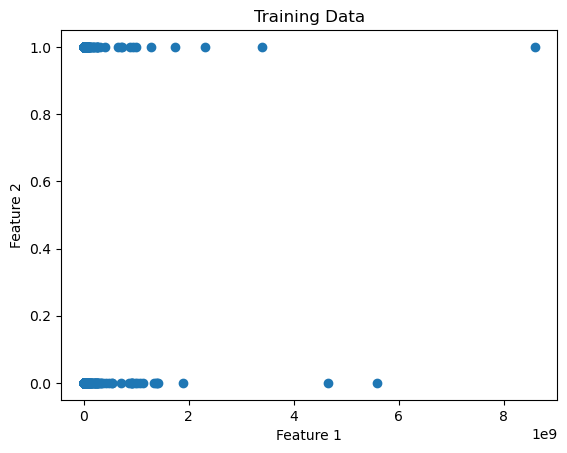

In [23]:
import matplotlib.pyplot as plt

# plot the training data
plt.scatter(X_train[:,1], y_train)
plt.title('Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 20


nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                3520      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_8 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 6,591
Trainable params: 6,591
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints3/",exist_ok=True)
checkpoint_path = "checkpoints3/weights.{epoch:02d}.hdf5"

# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [26]:
# Train the model
fit_model = nn3.fit(X_train,y_train,epochs=10,callbacks=[cp_callback])

Epoch 1/10
  1/804 [..............................] - ETA: 11:43 - loss: 11032.2646 - accuracy: 0.3438
Epoch 00001: saving model to checkpoints3\weights.01.hdf5
  7/804 [..............................] - ETA: 6s - loss: 5534.4302 - accuracy: 0.4509    
Epoch 00001: saving model to checkpoints3\weights.01.hdf5
 13/804 [..............................] - ETA: 6s - loss: 3360.3577 - accuracy: 0.5000
Epoch 00001: saving model to checkpoints3\weights.01.hdf5

Epoch 00001: saving model to checkpoints3\weights.01.hdf5
 21/804 [..............................] - ETA: 6s - loss: 2370.5449 - accuracy: 0.4821
Epoch 00001: saving model to checkpoints3\weights.01.hdf5
 29/804 [>.............................] - ETA: 6s - loss: 1883.1533 - accuracy: 0.5032
Epoch 00001: saving model to checkpoints3\weights.01.hdf5

Epoch 00001: saving model to checkpoints3\weights.01.hdf5
 36/804 [>.............................] - ETA: 6s - loss: 2991.5625 - accuracy: 0.4913
Epoch 00001: saving model to checkpoints3\wei

296/804 [==========>...................] - ETA: 5s - loss: 12577.9287 - accuracy: 0.4951
Epoch 00001: saving model to checkpoints3\weights.01.hdf5
301/804 [==========>...................] - ETA: 5s - loss: 12438.1865 - accuracy: 0.4955
Epoch 00001: saving model to checkpoints3\weights.01.hdf5
307/804 [==========>...................] - ETA: 5s - loss: 12419.9287 - accuracy: 0.4964
Epoch 00001: saving model to checkpoints3\weights.01.hdf5
312/804 [==========>...................] - ETA: 5s - loss: 12247.0986 - accuracy: 0.4970
Epoch 00001: saving model to checkpoints3\weights.01.hdf5
317/804 [==========>...................] - ETA: 5s - loss: 12079.7588 - accuracy: 0.4980
Epoch 00001: saving model to checkpoints3\weights.01.hdf5
323/804 [===========>..................] - ETA: 5s - loss: 12075.4775 - accuracy: 0.4985
Epoch 00001: saving model to checkpoints3\weights.01.hdf5
330/804 [===========>..................] - ETA: 5s - loss: 11827.3447 - accuracy: 0.4991
Epoch 00001: saving model to 

591/804 [=====================>........] - ETA: 2s - loss: 10796.4717 - accuracy: 0.4946
Epoch 00001: saving model to checkpoints3\weights.01.hdf5
596/804 [=====================>........] - ETA: 2s - loss: 10707.0420 - accuracy: 0.4951
Epoch 00001: saving model to checkpoints3\weights.01.hdf5
601/804 [=====================>........] - ETA: 2s - loss: 10634.3643 - accuracy: 0.4952
Epoch 00001: saving model to checkpoints3\weights.01.hdf5
608/804 [=====================>........] - ETA: 2s - loss: 10559.3174 - accuracy: 0.4951
Epoch 00001: saving model to checkpoints3\weights.01.hdf5

Epoch 00001: saving model to checkpoints3\weights.01.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 10446.3301 - accuracy: 0.4953
Epoch 00001: saving model to checkpoints3\weights.01.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 10363.5703 - accuracy: 0.4953
Epoch 00001: saving model to checkpoints3\weights.01.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 

 87/804 [==>...........................] - ETA: 7s - loss: 3642.6663 - accuracy: 0.5233
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
 92/804 [==>...........................] - ETA: 7s - loss: 3451.6284 - accuracy: 0.5217
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
 97/804 [==>...........................] - ETA: 7s - loss: 3274.3909 - accuracy: 0.5229
Epoch 00002: saving model to checkpoints3\weights.02.hdf5

Epoch 00002: saving model to checkpoints3\weights.02.hdf5
107/804 [==>...........................] - ETA: 7s - loss: 3009.3599 - accuracy: 0.5210
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
112/804 [===>..........................] - ETA: 7s - loss: 2876.2500 - accuracy: 0.5206
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
120/804 [===>..........................] - ETA: 7s - loss: 2685.3289 - accuracy: 0.5193
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
125/804 [===>..........................] - ETA: 6s - loss: 2580.0

393/804 [=============>................] - ETA: 4s - loss: 3169.3320 - accuracy: 0.4909
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
400/804 [=============>................] - ETA: 4s - loss: 3476.6719 - accuracy: 0.4905
Epoch 00002: saving model to checkpoints3\weights.02.hdf5

Epoch 00002: saving model to checkpoints3\weights.02.hdf5
407/804 [==============>...............] - ETA: 4s - loss: 3417.4568 - accuracy: 0.4911
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
412/804 [==============>...............] - ETA: 3s - loss: 3375.9912 - accuracy: 0.4918
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
417/804 [==============>...............] - ETA: 3s - loss: 3335.5200 - accuracy: 0.4925
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 3296.0083 - accuracy: 0.4929
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
427/804 [==============>...............] - ETA: 3s - loss: 3257.4

697/804 [=========================>....] - ETA: 1s - loss: 1995.8516 - accuracy: 0.5074
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
703/804 [=========================>....] - ETA: 1s - loss: 1978.8228 - accuracy: 0.5077
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 1967.6306 - accuracy: 0.5082
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 1953.8180 - accuracy: 0.5086
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 1940.1975 - accuracy: 0.5094
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 1926.7661 - accuracy: 0.5095
Epoch 00002: saving model to checkpoints3\weights.02.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 1913.5194 - accuracy: 0.5096
Epoch 00002: saving model to checkpo

196/804 [======>.......................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5303
Epoch 00003: saving model to checkpoints3\weights.03.hdf5

Epoch 00003: saving model to checkpoints3\weights.03.hdf5
203/804 [======>.......................] - ETA: 6s - loss: 0.6918 - accuracy: 0.5311
Epoch 00003: saving model to checkpoints3\weights.03.hdf5
210/804 [======>.......................] - ETA: 5s - loss: 0.6916 - accuracy: 0.5327
Epoch 00003: saving model to checkpoints3\weights.03.hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5332
Epoch 00003: saving model to checkpoints3\weights.03.hdf5
218/804 [=======>......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5330
Epoch 00003: saving model to checkpoints3\weights.03.hdf5
225/804 [=======>......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5332
Epoch 00003: saving model to checkpoints3\weights.03.hdf5
231/804 [=======>......................] - ETA: 5s - loss: 0.6914 - accuracy: 0.533

503/804 [=================>............] - ETA: 2s - loss: 0.6922 - accuracy: 0.5266
Epoch 00003: saving model to checkpoints3\weights.03.hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.6922 - accuracy: 0.5265
Epoch 00003: saving model to checkpoints3\weights.03.hdf5
513/804 [==================>...........] - ETA: 2s - loss: 0.6922 - accuracy: 0.5265
Epoch 00003: saving model to checkpoints3\weights.03.hdf5
518/804 [==================>...........] - ETA: 2s - loss: 0.6921 - accuracy: 0.5268
Epoch 00003: saving model to checkpoints3\weights.03.hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.6922 - accuracy: 0.5262
Epoch 00003: saving model to checkpoints3\weights.03.hdf5
528/804 [==================>...........] - ETA: 2s - loss: 0.6921 - accuracy: 0.5268
Epoch 00003: saving model to checkpoints3\weights.03.hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.6921 - accuracy: 0.5269
Epoch 00003: saving model to checkpoints3\weights.03.hdf5

  6/804 [..............................] - ETA: 8s - loss: 0.6858 - accuracy: 0.5677
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
  9/804 [..............................] - ETA: 10s - loss: 0.6876 - accuracy: 0.5556
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
 14/804 [..............................] - ETA: 10s - loss: 0.6899 - accuracy: 0.5402
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
 19/804 [..............................] - ETA: 10s - loss: 0.6908 - accuracy: 0.5345
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
 27/804 [>.............................] - ETA: 8s - loss: 0.6881 - accuracy: 0.5521 
Epoch 00004: saving model to checkpoints3\weights.04.hdf5

Epoch 00004: saving model to checkpoints3\weights.04.hdf5
 34/804 [>.............................] - ETA: 8s - loss: 0.6886 - accuracy: 0.5487
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
 39/804 [>.............................] - ETA: 8s - loss: 0.6885 - accuracy: 0

309/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5304
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
316/804 [==========>...................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5308
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
323/804 [===========>..................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5305
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
328/804 [===========>..................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5300
Epoch 00004: saving model to checkpoints3\weights.04.hdf5

Epoch 00004: saving model to checkpoints3\weights.04.hdf5
334/804 [===========>..................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5311
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
339/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5321
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
345/804 [===========>..................] - ETA: 4s - loss: 0.6911 - accuracy: 0.532

619/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5289
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 00004: saving model to checkpoints3\weights.04.hdf5

Epoch 00004: saving model to checkpoints3\weights.04.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5295
Epoch 00004: saving model to checkpoints3\weights.04.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.529

134/804 [====>.........................] - ETA: 6s - loss: 0.6922 - accuracy: 0.5245
Epoch 00005: saving model to checkpoints3\weights.05.hdf5

Epoch 00005: saving model to checkpoints3\weights.05.hdf5
140/804 [====>.........................] - ETA: 6s - loss: 0.6920 - accuracy: 0.5259
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
145/804 [====>.........................] - ETA: 6s - loss: 0.6919 - accuracy: 0.5267
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
150/804 [====>.........................] - ETA: 6s - loss: 0.6923 - accuracy: 0.5235
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
155/804 [====>.........................] - ETA: 6s - loss: 0.6924 - accuracy: 0.5228
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
160/804 [====>.........................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5209
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
166/804 [=====>........................] - ETA: 6s - loss: 0.6928 - accuracy: 0.519

435/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5287
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
444/804 [===============>..............] - ETA: 3s - loss: 0.6916 - accuracy: 0.5284
Epoch 00005: saving model to checkpoints3\weights.05.hdf5

Epoch 00005: saving model to checkpoints3\weights.05.hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5294
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
455/804 [===============>..............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5297
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
460/804 [================>.............] - ETA: 3s - loss: 0.6915 - accuracy: 0.5296
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
465/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.5301
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.6914 - accuracy: 0.530

745/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 00005: saving model to checkpoints3\weights.05.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 00005: saving model to checkpoints3\weights.05.hdf5

249/804 [========>.....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5294
Epoch 00006: saving model to checkpoints3\weights.06.hdf5

Epoch 00006: saving model to checkpoints3\weights.06.hdf5
256/804 [========>.....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5299
Epoch 00006: saving model to checkpoints3\weights.06.hdf5
262/804 [========>.....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5291
Epoch 00006: saving model to checkpoints3\weights.06.hdf5
267/804 [========>.....................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5297
Epoch 00006: saving model to checkpoints3\weights.06.hdf5
272/804 [=========>....................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5292
Epoch 00006: saving model to checkpoints3\weights.06.hdf5
280/804 [=========>....................] - ETA: 5s - loss: 0.6913 - accuracy: 0.5308
Epoch 00006: saving model to checkpoints3\weights.06.hdf5
285/804 [=========>....................] - ETA: 5s - loss: 0.6913 - accuracy: 0.531

566/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5345
Epoch 00006: saving model to checkpoints3\weights.06.hdf5
572/804 [====================>.........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5348
Epoch 00006: saving model to checkpoints3\weights.06.hdf5
576/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 00006: saving model to checkpoints3\weights.06.hdf5
584/804 [====================>.........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 00006: saving model to checkpoints3\weights.06.hdf5

Epoch 00006: saving model to checkpoints3\weights.06.hdf5
591/804 [=====================>........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5349
Epoch 00006: saving model to checkpoints3\weights.06.hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5350
Epoch 00006: saving model to checkpoints3\weights.06.hdf5
602/804 [=====================>........] - ETA: 2s - loss: 0.6906 - accuracy: 0.535

 68/804 [=>............................] - ETA: 7s - loss: 0.6885 - accuracy: 0.5551
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
 75/804 [=>............................] - ETA: 7s - loss: 0.6876 - accuracy: 0.5608
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
 80/804 [=>............................] - ETA: 7s - loss: 0.6887 - accuracy: 0.5531
Epoch 00007: saving model to checkpoints3\weights.07.hdf5

Epoch 00007: saving model to checkpoints3\weights.07.hdf5
 87/804 [==>...........................] - ETA: 7s - loss: 0.6883 - accuracy: 0.5553
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
 92/804 [==>...........................] - ETA: 7s - loss: 0.6884 - accuracy: 0.5543
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
100/804 [==>...........................] - ETA: 7s - loss: 0.6885 - accuracy: 0.5531
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
105/804 [==>...........................] - ETA: 6s - loss: 0.6884 - accuracy: 0.554

375/804 [============>.................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5360
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
380/804 [=============>................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5360
Epoch 00007: saving model to checkpoints3\weights.07.hdf5

Epoch 00007: saving model to checkpoints3\weights.07.hdf5
387/804 [=============>................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5365
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
392/804 [=============>................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5363
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
397/804 [=============>................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5361
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
402/804 [==============>...............] - ETA: 4s - loss: 0.6907 - accuracy: 0.5358
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
407/804 [==============>...............] - ETA: 4s - loss: 0.6907 - accuracy: 0.535

687/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 00007: saving model to checkpoints3\weights.07.hdf5

Epoch 00007: saving model to checkpoints3\weights.07.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.533

204/804 [======>.......................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5306
Epoch 00008: saving model to checkpoints3\weights.08.hdf5
209/804 [======>.......................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5304
Epoch 00008: saving model to checkpoints3\weights.08.hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5307
Epoch 00008: saving model to checkpoints3\weights.08.hdf5
218/804 [=======>......................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5297
Epoch 00008: saving model to checkpoints3\weights.08.hdf5
227/804 [=======>......................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5260
Epoch 00008: saving model to checkpoints3\weights.08.hdf5

Epoch 00008: saving model to checkpoints3\weights.08.hdf5
233/804 [=======>......................] - ETA: 5s - loss: 0.6919 - accuracy: 0.5263
Epoch 00008: saving model to checkpoints3\weights.08.hdf5
238/804 [=======>......................] - ETA: 5s - loss: 0.6918 - accuracy: 0.526

514/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5297
Epoch 00008: saving model to checkpoints3\weights.08.hdf5

Epoch 00008: saving model to checkpoints3\weights.08.hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 00008: saving model to checkpoints3\weights.08.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5297
Epoch 00008: saving model to checkpoints3\weights.08.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 00008: saving model to checkpoints3\weights.08.hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 00008: saving model to checkpoints3\weights.08.hdf5

Epoch 00008: saving model to checkpoints3\weights.08.hdf5
548/804 [===================>..........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 00008: saving model to checkpoints3\weights.08.hdf5
553/804 [===============

 16/804 [..............................] - ETA: 8s - loss: 0.6978 - accuracy: 0.4863
Epoch 00009: saving model to checkpoints3\weights.09.hdf5
 22/804 [..............................] - ETA: 7s - loss: 0.6966 - accuracy: 0.4943
Epoch 00009: saving model to checkpoints3\weights.09.hdf5

Epoch 00009: saving model to checkpoints3\weights.09.hdf5
 29/804 [>.............................] - ETA: 8s - loss: 0.6945 - accuracy: 0.5097
Epoch 00009: saving model to checkpoints3\weights.09.hdf5
 35/804 [>.............................] - ETA: 7s - loss: 0.6942 - accuracy: 0.5107
Epoch 00009: saving model to checkpoints3\weights.09.hdf5
 39/804 [>.............................] - ETA: 8s - loss: 0.6943 - accuracy: 0.5096
Epoch 00009: saving model to checkpoints3\weights.09.hdf5
 44/804 [>.............................] - ETA: 8s - loss: 0.6935 - accuracy: 0.5156
Epoch 00009: saving model to checkpoints3\weights.09.hdf5
 50/804 [>.............................] - ETA: 8s - loss: 0.6933 - accuracy: 0.517

324/804 [===========>..................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5223
Epoch 00009: saving model to checkpoints3\weights.09.hdf5
332/804 [===========>..................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5217
Epoch 00009: saving model to checkpoints3\weights.09.hdf5
337/804 [===========>..................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5209
Epoch 00009: saving model to checkpoints3\weights.09.hdf5
341/804 [===========>..................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5206
Epoch 00009: saving model to checkpoints3\weights.09.hdf5
348/804 [===========>..................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5207
Epoch 00009: saving model to checkpoints3\weights.09.hdf5

Epoch 00009: saving model to checkpoints3\weights.09.hdf5
354/804 [============>.................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5208
Epoch 00009: saving model to checkpoints3\weights.09.hdf5
359/804 [============>.................] - ETA: 4s - loss: 0.6924 - accuracy: 0.521

633/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 00009: saving model to checkpoints3\weights.09.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 00009: saving model to checkpoints3\weights.09.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5303
Epoch 00009: saving model to checkpoints3\weights.09.hdf5

Epoch 00009: saving model to checkpoints3\weights.09.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5305
Epoch 00009: saving model to checkpoints3\weights.09.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 00009: saving model to checkpoints3\weights.09.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 00009: saving model to checkpoints3\weights.09.hdf5

Epoch 00009: saving model to checkpoints3\weights.09.hdf5
669/804 [===============

135/804 [====>.........................] - ETA: 6s - loss: 0.6908 - accuracy: 0.5350
Epoch 00010: saving model to checkpoints3\weights.10.hdf5
140/804 [====>.........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5355
Epoch 00010: saving model to checkpoints3\weights.10.hdf5
145/804 [====>.........................] - ETA: 6s - loss: 0.6907 - accuracy: 0.5356
Epoch 00010: saving model to checkpoints3\weights.10.hdf5
154/804 [====>.........................] - ETA: 6s - loss: 0.6905 - accuracy: 0.5367
Epoch 00010: saving model to checkpoints3\weights.10.hdf5

Epoch 00010: saving model to checkpoints3\weights.10.hdf5
160/804 [====>.........................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5387
Epoch 00010: saving model to checkpoints3\weights.10.hdf5
165/804 [=====>........................] - ETA: 6s - loss: 0.6904 - accuracy: 0.5373
Epoch 00010: saving model to checkpoints3\weights.10.hdf5
170/804 [=====>........................] - ETA: 6s - loss: 0.6903 - accuracy: 0.538

455/804 [===============>..............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5322
Epoch 00010: saving model to checkpoints3\weights.10.hdf5
460/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 00010: saving model to checkpoints3\weights.10.hdf5
465/804 [================>.............] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 00010: saving model to checkpoints3\weights.10.hdf5
473/804 [================>.............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5324
Epoch 00010: saving model to checkpoints3\weights.10.hdf5

Epoch 00010: saving model to checkpoints3\weights.10.hdf5
480/804 [================>.............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5331
Epoch 00010: saving model to checkpoints3\weights.10.hdf5
488/804 [=================>............] - ETA: 3s - loss: 0.6911 - accuracy: 0.5325
Epoch 00010: saving model to checkpoints3\weights.10.hdf5
493/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.532

770/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00010: saving model to checkpoints3\weights.10.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 00010: saving model to checkpoints3\weights.10.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00010: saving model to checkpoints3\weights.10.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 00010: saving model to checkpoints3\weights.10.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 00010: saving model to checkpoints3\weights.10.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 00010: saving model to checkpoints3\weights.10.hdf5

Epoch 00010: saving model to checkpoints3\weights.10.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.6912 - accuracy: 

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6864 - accuracy: 0.5874
Loss: 0.6864203810691833, Accuracy: 0.587405264377594


# Optimization 4

In [28]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns=["IS_SUCCESSFUL", "STATUS"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)
# Create a StandardScaler instances
scaler = StandardScaler()


# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30



nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 80)                3440      
_________________________________________________________________
dense_11 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 31        
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints4/",exist_ok=True)
checkpoint_path = "checkpoints4/weights.{epoch:02d}.hdf5"

# Compile the model
nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [31]:
# Train the model
fit_model = nn4.fit(X_train,y_train,epochs=10,callbacks=[cp_callback])

Epoch 1/10
  1/804 [..............................] - ETA: 10:56 - loss: 419.4272 - accuracy: 0.5312
Epoch 00001: saving model to checkpoints4\weights.01.hdf5
  8/804 [..............................] - ETA: 5s - loss: 82797.8672 - accuracy: 0.4609 
Epoch 00001: saving model to checkpoints4\weights.01.hdf5

Epoch 00001: saving model to checkpoints4\weights.01.hdf5
 16/804 [..............................] - ETA: 6s - loss: 44517.5977 - accuracy: 0.5078
Epoch 00001: saving model to checkpoints4\weights.01.hdf5
 24/804 [..............................] - ETA: 6s - loss: 33867.9609 - accuracy: 0.5221
Epoch 00001: saving model to checkpoints4\weights.01.hdf5
 28/804 [>.............................] - ETA: 6s - loss: 32261.8887 - accuracy: 0.5212
Epoch 00001: saving model to checkpoints4\weights.01.hdf5
 31/804 [>.............................] - ETA: 7s - loss: 35409.1406 - accuracy: 0.5202
Epoch 00001: saving model to checkpoints4\weights.01.hdf5
 36/804 [>.............................] - ETA

311/804 [==========>...................] - ETA: 4s - loss: 61459.7422 - accuracy: 0.4994
Epoch 00001: saving model to checkpoints4\weights.01.hdf5
319/804 [==========>...................] - ETA: 4s - loss: 61147.8008 - accuracy: 0.4995
Epoch 00001: saving model to checkpoints4\weights.01.hdf5

Epoch 00001: saving model to checkpoints4\weights.01.hdf5
326/804 [===========>..................] - ETA: 4s - loss: 61971.2656 - accuracy: 0.5001
Epoch 00001: saving model to checkpoints4\weights.01.hdf5
334/804 [===========>..................] - ETA: 4s - loss: 60510.8125 - accuracy: 0.5006
Epoch 00001: saving model to checkpoints4\weights.01.hdf5

Epoch 00001: saving model to checkpoints4\weights.01.hdf5
341/804 [===========>..................] - ETA: 4s - loss: 59352.3008 - accuracy: 0.5001
Epoch 00001: saving model to checkpoints4\weights.01.hdf5
348/804 [===========>..................] - ETA: 4s - loss: 58645.7695 - accuracy: 0.4985
Epoch 00001: saving model to checkpoints4\weights.01.hdf5


655/804 [=======================>......] - ETA: 1s - loss: 38244.8672 - accuracy: 0.4990
Epoch 00001: saving model to checkpoints4\weights.01.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 39222.5430 - accuracy: 0.4992
Epoch 00001: saving model to checkpoints4\weights.01.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 40716.8984 - accuracy: 0.4999
Epoch 00001: saving model to checkpoints4\weights.01.hdf5

Epoch 00001: saving model to checkpoints4\weights.01.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 40333.1875 - accuracy: 0.4994
Epoch 00001: saving model to checkpoints4\weights.01.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 40072.8047 - accuracy: 0.4988
Epoch 00001: saving model to checkpoints4\weights.01.hdf5

Epoch 00001: saving model to checkpoints4\weights.01.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 40102.3711 - accuracy: 0.4992
Epoch 00001: saving model to checkpoints4\weights.01.hdf5


190/804 [======>.......................] - ETA: 5s - loss: 10356.1992 - accuracy: 0.4913
Epoch 00002: saving model to checkpoints4\weights.02.hdf5

Epoch 00002: saving model to checkpoints4\weights.02.hdf5
197/804 [======>.......................] - ETA: 5s - loss: 10141.8740 - accuracy: 0.4918
Epoch 00002: saving model to checkpoints4\weights.02.hdf5
204/804 [======>.......................] - ETA: 5s - loss: 9810.4268 - accuracy: 0.4888 
Epoch 00002: saving model to checkpoints4\weights.02.hdf5
209/804 [======>.......................] - ETA: 5s - loss: 10857.5977 - accuracy: 0.4864
Epoch 00002: saving model to checkpoints4\weights.02.hdf5
216/804 [=======>......................] - ETA: 5s - loss: 10590.2588 - accuracy: 0.4861
Epoch 00002: saving model to checkpoints4\weights.02.hdf5

Epoch 00002: saving model to checkpoints4\weights.02.hdf5
222/804 [=======>......................] - ETA: 5s - loss: 10312.0410 - accuracy: 0.4861
Epoch 00002: saving model to checkpoints4\weights.02.hdf5


502/804 [=================>............] - ETA: 2s - loss: 91409.4375 - accuracy: 0.5036
Epoch 00002: saving model to checkpoints4\weights.02.hdf5
510/804 [==================>...........] - ETA: 2s - loss: 90989.8594 - accuracy: 0.5044
Epoch 00002: saving model to checkpoints4\weights.02.hdf5

Epoch 00002: saving model to checkpoints4\weights.02.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 89905.4844 - accuracy: 0.5051
Epoch 00002: saving model to checkpoints4\weights.02.hdf5

Epoch 00002: saving model to checkpoints4\weights.02.hdf5
527/804 [==================>...........] - ETA: 2s - loss: 88277.3906 - accuracy: 0.5053
Epoch 00002: saving model to checkpoints4\weights.02.hdf5
536/804 [===================>..........] - ETA: 2s - loss: 87197.6953 - accuracy: 0.5052
Epoch 00002: saving model to checkpoints4\weights.02.hdf5
541/804 [===================>..........] - ETA: 2s - loss: 86439.1250 - accuracy: 0.5050
Epoch 00002: saving model to checkpoints4\weights.02.hdf5


 27/804 [>.............................] - ETA: 6s - loss: 26282.8418 - accuracy: 0.4456
Epoch 00003: saving model to checkpoints4\weights.03.hdf5

Epoch 00003: saving model to checkpoints4\weights.03.hdf5
 33/804 [>.............................] - ETA: 7s - loss: 24111.5586 - accuracy: 0.4545
Epoch 00003: saving model to checkpoints4\weights.03.hdf5
 38/804 [>.............................] - ETA: 7s - loss: 21404.1973 - accuracy: 0.4507
Epoch 00003: saving model to checkpoints4\weights.03.hdf5
 47/804 [>.............................] - ETA: 7s - loss: 17902.6172 - accuracy: 0.4508
Epoch 00003: saving model to checkpoints4\weights.03.hdf5

Epoch 00003: saving model to checkpoints4\weights.03.hdf5
 53/804 [>.............................] - ETA: 7s - loss: 33857.9297 - accuracy: 0.4611
Epoch 00003: saving model to checkpoints4\weights.03.hdf5
 59/804 [=>............................] - ETA: 7s - loss: 31338.6465 - accuracy: 0.4645
Epoch 00003: saving model to checkpoints4\weights.03.hdf5


365/804 [============>.................] - ETA: 3s - loss: 80155.2891 - accuracy: 0.5001
Epoch 00003: saving model to checkpoints4\weights.03.hdf5
371/804 [============>.................] - ETA: 3s - loss: 78861.8281 - accuracy: 0.4997
Epoch 00003: saving model to checkpoints4\weights.03.hdf5

Epoch 00003: saving model to checkpoints4\weights.03.hdf5
378/804 [=============>................] - ETA: 3s - loss: 77403.4062 - accuracy: 0.4999
Epoch 00003: saving model to checkpoints4\weights.03.hdf5
386/804 [=============>................] - ETA: 3s - loss: 75841.0859 - accuracy: 0.5005
Epoch 00003: saving model to checkpoints4\weights.03.hdf5

Epoch 00003: saving model to checkpoints4\weights.03.hdf5
393/804 [=============>................] - ETA: 3s - loss: 74518.8516 - accuracy: 0.5021
Epoch 00003: saving model to checkpoints4\weights.03.hdf5
400/804 [=============>................] - ETA: 3s - loss: 73216.5781 - accuracy: 0.5023
Epoch 00003: saving model to checkpoints4\weights.03.hdf5


708/804 [=========================>....] - ETA: 0s - loss: 58283.2930 - accuracy: 0.4931
Epoch 00003: saving model to checkpoints4\weights.03.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 57637.3125 - accuracy: 0.4925
Epoch 00003: saving model to checkpoints4\weights.03.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 57187.6914 - accuracy: 0.4923
Epoch 00003: saving model to checkpoints4\weights.03.hdf5

Epoch 00003: saving model to checkpoints4\weights.03.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 56724.1367 - accuracy: 0.4923
Epoch 00003: saving model to checkpoints4\weights.03.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 56045.2812 - accuracy: 0.4923
Epoch 00003: saving model to checkpoints4\weights.03.hdf5

Epoch 00003: saving model to checkpoints4\weights.03.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 55597.1914 - accuracy: 0.4925
Epoch 00003: saving model to checkpoints4\weights.03.hdf5


248/804 [========>.....................] - ETA: 4s - loss: 5795.0620 - accuracy: 0.4977
Epoch 00004: saving model to checkpoints4\weights.04.hdf5

Epoch 00004: saving model to checkpoints4\weights.04.hdf5
254/804 [========>.....................] - ETA: 4s - loss: 5661.7236 - accuracy: 0.4994
Epoch 00004: saving model to checkpoints4\weights.04.hdf5
261/804 [========>.....................] - ETA: 4s - loss: 5510.4087 - accuracy: 0.5012
Epoch 00004: saving model to checkpoints4\weights.04.hdf5
268/804 [=========>....................] - ETA: 4s - loss: 5375.8423 - accuracy: 0.5033
Epoch 00004: saving model to checkpoints4\weights.04.hdf5

Epoch 00004: saving model to checkpoints4\weights.04.hdf5
274/804 [=========>....................] - ETA: 4s - loss: 5261.2881 - accuracy: 0.5062
Epoch 00004: saving model to checkpoints4\weights.04.hdf5

Epoch 00004: saving model to checkpoints4\weights.04.hdf5
284/804 [=========>....................] - ETA: 4s - loss: 5098.4131 - accuracy: 0.5091
Epoch

604/804 [=====================>........] - ETA: 1s - loss: 18428.9648 - accuracy: 0.5165
Epoch 00004: saving model to checkpoints4\weights.04.hdf5

Epoch 00004: saving model to checkpoints4\weights.04.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 18591.5723 - accuracy: 0.5163
Epoch 00004: saving model to checkpoints4\weights.04.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 18944.3379 - accuracy: 0.5164
Epoch 00004: saving model to checkpoints4\weights.04.hdf5

Epoch 00004: saving model to checkpoints4\weights.04.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 18797.2012 - accuracy: 0.5168
Epoch 00004: saving model to checkpoints4\weights.04.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 18653.8711 - accuracy: 0.5169
Epoch 00004: saving model to checkpoints4\weights.04.hdf5
643/804 [======================>.......] - ETA: 1s - loss: 18708.0117 - accuracy: 0.5174
Epoch 00004: saving model to checkpoints4\weights.04.hdf5


131/804 [===>..........................] - ETA: 6s - loss: 41811.3984 - accuracy: 0.4959
Epoch 00005: saving model to checkpoints4\weights.05.hdf5
139/804 [====>.........................] - ETA: 6s - loss: 39416.6016 - accuracy: 0.4971
Epoch 00005: saving model to checkpoints4\weights.05.hdf5
142/804 [====>.........................] - ETA: 6s - loss: 38595.3594 - accuracy: 0.4965
Epoch 00005: saving model to checkpoints4\weights.05.hdf5
145/804 [====>.........................] - ETA: 6s - loss: 37808.1328 - accuracy: 0.4970
Epoch 00005: saving model to checkpoints4\weights.05.hdf5
152/804 [====>.........................] - ETA: 6s - loss: 36133.1484 - accuracy: 0.4953
Epoch 00005: saving model to checkpoints4\weights.05.hdf5

Epoch 00005: saving model to checkpoints4\weights.05.hdf5
160/804 [====>.........................] - ETA: 6s - loss: 34395.8125 - accuracy: 0.4939
Epoch 00005: saving model to checkpoints4\weights.05.hdf5
169/804 [=====>........................] - ETA: 5s - loss: 


Epoch 00005: saving model to checkpoints4\weights.05.hdf5
465/804 [================>.............] - ETA: 3s - loss: 15557.9902 - accuracy: 0.4966
Epoch 00005: saving model to checkpoints4\weights.05.hdf5

Epoch 00005: saving model to checkpoints4\weights.05.hdf5
475/804 [================>.............] - ETA: 2s - loss: 15298.3545 - accuracy: 0.4988
Epoch 00005: saving model to checkpoints4\weights.05.hdf5
483/804 [=================>............] - ETA: 2s - loss: 15066.7236 - accuracy: 0.4992
Epoch 00005: saving model to checkpoints4\weights.05.hdf5

Epoch 00005: saving model to checkpoints4\weights.05.hdf5
490/804 [=================>............] - ETA: 2s - loss: 14858.8027 - accuracy: 0.4999
Epoch 00005: saving model to checkpoints4\weights.05.hdf5
499/804 [=================>............] - ETA: 2s - loss: 14598.1182 - accuracy: 0.5001
Epoch 00005: saving model to checkpoints4\weights.05.hdf5

Epoch 00005: saving model to checkpoints4\weights.05.hdf5
505/804 [=================>..

795/804 [============================>.] - ETA: 0s - loss: 11069.0703 - accuracy: 0.5071
Epoch 00005: saving model to checkpoints4\weights.05.hdf5
804/804 [==============================] - ETA: 0s - loss: 10956.2461 - accuracy: 0.5069
Epoch 00005: saving model to checkpoints4\weights.05.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 10956.2461 - accuracy: 0.5069
Epoch 6/10
  1/804 [..............................] - ETA: 2s - loss: 1335.7637 - accuracy: 0.3750
Epoch 00006: saving model to checkpoints4\weights.06.hdf5
  8/804 [..............................] - ETA: 5s - loss: 8048.6729 - accuracy: 0.4023
Epoch 00006: saving model to checkpoints4\weights.06.hdf5
 11/804 [..............................] - ETA: 8s - loss: 5999.8545 - accuracy: 0.4119
Epoch 00006: saving model to checkpoints4\weights.06.hdf5
 16/804 [..............................] - ETA: 8s - loss: 4395.7393 - accuracy: 0.4297
Epoch 00006: saving model to checkpoints4\weights.06.hdf5
 24/804 [.........

326/804 [===========>..................] - ETA: 4s - loss: 6649.2148 - accuracy: 0.5148
Epoch 00006: saving model to checkpoints4\weights.06.hdf5
331/804 [===========>..................] - ETA: 4s - loss: 6550.0659 - accuracy: 0.5141
Epoch 00006: saving model to checkpoints4\weights.06.hdf5
339/804 [===========>..................] - ETA: 4s - loss: 6403.9507 - accuracy: 0.5123
Epoch 00006: saving model to checkpoints4\weights.06.hdf5
345/804 [===========>..................] - ETA: 4s - loss: 6310.2271 - accuracy: 0.5125
Epoch 00006: saving model to checkpoints4\weights.06.hdf5

Epoch 00006: saving model to checkpoints4\weights.06.hdf5
351/804 [============>.................] - ETA: 3s - loss: 6214.8521 - accuracy: 0.5132
Epoch 00006: saving model to checkpoints4\weights.06.hdf5
357/804 [============>.................] - ETA: 3s - loss: 6153.9536 - accuracy: 0.5128
Epoch 00006: saving model to checkpoints4\weights.06.hdf5
364/804 [============>.................] - ETA: 3s - loss: 6080.2

660/804 [=======================>......] - ETA: 1s - loss: 6975.2046 - accuracy: 0.4938
Epoch 00006: saving model to checkpoints4\weights.06.hdf5

Epoch 00006: saving model to checkpoints4\weights.06.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 6956.4736 - accuracy: 0.4933
Epoch 00006: saving model to checkpoints4\weights.06.hdf5

Epoch 00006: saving model to checkpoints4\weights.06.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 11482.5010 - accuracy: 0.4933
Epoch 00006: saving model to checkpoints4\weights.06.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 11596.0850 - accuracy: 0.4938
Epoch 00006: saving model to checkpoints4\weights.06.hdf5

Epoch 00006: saving model to checkpoints4\weights.06.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 11530.1455 - accuracy: 0.4940
Epoch 00006: saving model to checkpoints4\weights.06.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 11640.6104 - accuracy: 0.4939
E


Epoch 00007: saving model to checkpoints4\weights.07.hdf5
182/804 [=====>........................] - ETA: 5s - loss: 10363.8818 - accuracy: 0.5046
Epoch 00007: saving model to checkpoints4\weights.07.hdf5
191/804 [======>.......................] - ETA: 5s - loss: 9881.1602 - accuracy: 0.5023 
Epoch 00007: saving model to checkpoints4\weights.07.hdf5

Epoch 00007: saving model to checkpoints4\weights.07.hdf5
197/804 [======>.......................] - ETA: 5s - loss: 9581.6396 - accuracy: 0.5030
Epoch 00007: saving model to checkpoints4\weights.07.hdf5
204/804 [======>.......................] - ETA: 5s - loss: 9255.6934 - accuracy: 0.5078
Epoch 00007: saving model to checkpoints4\weights.07.hdf5
211/804 [======>.......................] - ETA: 5s - loss: 8949.5156 - accuracy: 0.5118
Epoch 00007: saving model to checkpoints4\weights.07.hdf5

Epoch 00007: saving model to checkpoints4\weights.07.hdf5
217/804 [=======>......................] - ETA: 5s - loss: 8702.3994 - accuracy: 0.5143
Epo

528/804 [==================>...........] - ETA: 2s - loss: 4010.2021 - accuracy: 0.5412
Epoch 00007: saving model to checkpoints4\weights.07.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 3957.9167 - accuracy: 0.5409
Epoch 00007: saving model to checkpoints4\weights.07.hdf5

Epoch 00007: saving model to checkpoints4\weights.07.hdf5
542/804 [===================>..........] - ETA: 2s - loss: 3929.6011 - accuracy: 0.5409
Epoch 00007: saving model to checkpoints4\weights.07.hdf5
548/804 [===================>..........] - ETA: 2s - loss: 3889.8777 - accuracy: 0.5400
Epoch 00007: saving model to checkpoints4\weights.07.hdf5
555/804 [===================>..........] - ETA: 2s - loss: 4220.2520 - accuracy: 0.5386
Epoch 00007: saving model to checkpoints4\weights.07.hdf5

Epoch 00007: saving model to checkpoints4\weights.07.hdf5
562/804 [===================>..........] - ETA: 2s - loss: 4173.8169 - accuracy: 0.5373
Epoch 00007: saving model to checkpoints4\weights.07.hdf5
569/80

 48/804 [>.............................] - ETA: 7s - loss: 1220.7279 - accuracy: 0.5371
Epoch 00008: saving model to checkpoints4\weights.08.hdf5
 55/804 [=>............................] - ETA: 6s - loss: 1076.8474 - accuracy: 0.5392
Epoch 00008: saving model to checkpoints4\weights.08.hdf5

Epoch 00008: saving model to checkpoints4\weights.08.hdf5
 63/804 [=>............................] - ETA: 6s - loss: 951.6599 - accuracy: 0.5347 
Epoch 00008: saving model to checkpoints4\weights.08.hdf5

Epoch 00008: saving model to checkpoints4\weights.08.hdf5
 73/804 [=>............................] - ETA: 6s - loss: 901.4999 - accuracy: 0.5364
Epoch 00008: saving model to checkpoints4\weights.08.hdf5

Epoch 00008: saving model to checkpoints4\weights.08.hdf5
 83/804 [==>...........................] - ETA: 6s - loss: 1286.3628 - accuracy: 0.5384
Epoch 00008: saving model to checkpoints4\weights.08.hdf5

Epoch 00008: saving model to checkpoints4\weights.08.hdf5
 93/804 [==>.......................

388/804 [=============>................] - ETA: 3s - loss: 783.0053 - accuracy: 0.5189
Epoch 00008: saving model to checkpoints4\weights.08.hdf5
395/804 [=============>................] - ETA: 3s - loss: 776.5631 - accuracy: 0.5175
Epoch 00008: saving model to checkpoints4\weights.08.hdf5

Epoch 00008: saving model to checkpoints4\weights.08.hdf5
403/804 [==============>...............] - ETA: 3s - loss: 764.0801 - accuracy: 0.5162
Epoch 00008: saving model to checkpoints4\weights.08.hdf5

Epoch 00008: saving model to checkpoints4\weights.08.hdf5
413/804 [==============>...............] - ETA: 3s - loss: 749.9384 - accuracy: 0.5155
Epoch 00008: saving model to checkpoints4\weights.08.hdf5
420/804 [==============>...............] - ETA: 3s - loss: 744.3070 - accuracy: 0.5149
Epoch 00008: saving model to checkpoints4\weights.08.hdf5

Epoch 00008: saving model to checkpoints4\weights.08.hdf5
428/804 [==============>...............] - ETA: 3s - loss: 749.3013 - accuracy: 0.5146
Epoch 00008

732/804 [==========================>...] - ETA: 0s - loss: 873.2957 - accuracy: 0.5175
Epoch 00008: saving model to checkpoints4\weights.08.hdf5

Epoch 00008: saving model to checkpoints4\weights.08.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 867.8820 - accuracy: 0.5180
Epoch 00008: saving model to checkpoints4\weights.08.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 952.7891 - accuracy: 0.5184
Epoch 00008: saving model to checkpoints4\weights.08.hdf5

Epoch 00008: saving model to checkpoints4\weights.08.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 959.9208 - accuracy: 0.5185
Epoch 00008: saving model to checkpoints4\weights.08.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 951.1992 - accuracy: 0.5179
Epoch 00008: saving model to checkpoints4\weights.08.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 948.4404 - accuracy: 0.5178
Epoch 00008: saving model to checkpoints4\weights.08.hdf5
769/804 [===

253/804 [========>.....................] - ETA: 5s - loss: 6981.6270 - accuracy: 0.4853
Epoch 00009: saving model to checkpoints4\weights.09.hdf5

Epoch 00009: saving model to checkpoints4\weights.09.hdf5
259/804 [========>.....................] - ETA: 5s - loss: 6825.9570 - accuracy: 0.4854
Epoch 00009: saving model to checkpoints4\weights.09.hdf5
266/804 [========>.....................] - ETA: 5s - loss: 6656.5664 - accuracy: 0.4839
Epoch 00009: saving model to checkpoints4\weights.09.hdf5
273/804 [=========>....................] - ETA: 4s - loss: 6492.8882 - accuracy: 0.4839
Epoch 00009: saving model to checkpoints4\weights.09.hdf5

Epoch 00009: saving model to checkpoints4\weights.09.hdf5
279/804 [=========>....................] - ETA: 4s - loss: 6358.9966 - accuracy: 0.4843
Epoch 00009: saving model to checkpoints4\weights.09.hdf5
288/804 [=========>....................] - ETA: 4s - loss: 6181.3423 - accuracy: 0.4843
Epoch 00009: saving model to checkpoints4\weights.09.hdf5

Epoch

599/804 [=====================>........] - ETA: 1s - loss: 3334.1382 - accuracy: 0.4966
Epoch 00009: saving model to checkpoints4\weights.09.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 3303.5649 - accuracy: 0.4980
Epoch 00009: saving model to checkpoints4\weights.09.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 3266.6931 - accuracy: 0.4996
Epoch 00009: saving model to checkpoints4\weights.09.hdf5

Epoch 00009: saving model to checkpoints4\weights.09.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 3229.8228 - accuracy: 0.5002
Epoch 00009: saving model to checkpoints4\weights.09.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 3195.7346 - accuracy: 0.5003
Epoch 00009: saving model to checkpoints4\weights.09.hdf5

Epoch 00009: saving model to checkpoints4\weights.09.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 3156.4626 - accuracy: 0.4999
Epoch 00009: saving model to checkpoints4\weights.09.hdf5

Epoch

127/804 [===>..........................] - ETA: 5s - loss: 6838.9497 - accuracy: 0.4825
Epoch 00010: saving model to checkpoints4\weights.10.hdf5
130/804 [===>..........................] - ETA: 6s - loss: 6682.1260 - accuracy: 0.4825
Epoch 00010: saving model to checkpoints4\weights.10.hdf5
138/804 [====>.........................] - ETA: 5s - loss: 6296.1230 - accuracy: 0.4841
Epoch 00010: saving model to checkpoints4\weights.10.hdf5

Epoch 00010: saving model to checkpoints4\weights.10.hdf5
145/804 [====>.........................] - ETA: 5s - loss: 5993.0308 - accuracy: 0.4871
Epoch 00010: saving model to checkpoints4\weights.10.hdf5
151/804 [====>.........................] - ETA: 5s - loss: 5873.0977 - accuracy: 0.4878
Epoch 00010: saving model to checkpoints4\weights.10.hdf5
158/804 [====>.........................] - ETA: 5s - loss: 5616.9189 - accuracy: 0.4891
Epoch 00010: saving model to checkpoints4\weights.10.hdf5
161/804 [=====>........................] - ETA: 5s - loss: 5546.5

455/804 [===============>..............] - ETA: 3s - loss: 2546.4607 - accuracy: 0.4920
Epoch 00010: saving model to checkpoints4\weights.10.hdf5
460/804 [================>.............] - ETA: 3s - loss: 2523.7400 - accuracy: 0.4924
Epoch 00010: saving model to checkpoints4\weights.10.hdf5
466/804 [================>.............] - ETA: 3s - loss: 2507.2021 - accuracy: 0.4926
Epoch 00010: saving model to checkpoints4\weights.10.hdf5
473/804 [================>.............] - ETA: 3s - loss: 2535.9082 - accuracy: 0.4922
Epoch 00010: saving model to checkpoints4\weights.10.hdf5

Epoch 00010: saving model to checkpoints4\weights.10.hdf5
480/804 [================>.............] - ETA: 2s - loss: 2536.2271 - accuracy: 0.4919
Epoch 00010: saving model to checkpoints4\weights.10.hdf5
487/804 [=================>............] - ETA: 2s - loss: 2504.0122 - accuracy: 0.4914
Epoch 00010: saving model to checkpoints4\weights.10.hdf5
494/804 [=================>............] - ETA: 2s - loss: 2469.7

795/804 [============================>.] - ETA: 0s - loss: 1581.8489 - accuracy: 0.4969
Epoch 00010: saving model to checkpoints4\weights.10.hdf5
804/804 [==============================] - ETA: 0s - loss: 1566.8138 - accuracy: 0.4967
Epoch 00010: saving model to checkpoints4\weights.10.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 1566.8138 - accuracy: 0.4967


In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.8196 - accuracy: 0.6489
Loss: 0.8195660710334778, Accuracy: 0.6488629579544067


In [33]:
# Export our model to HDF5 file
nn4.save("AlphabetSoupCharity_Optimization.h5")